In [1]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-2jd8_yq2
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-2jd8_yq2
  Resolved https://github.com/paulgavrikov/visualkeras to commit d7111d3471173c0b16853a6ce5e4cc645498380a
  Preparing metadata (setup.py) ... done


In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.models import load_model
from keras import backend as K
import PIL
import PIL
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
############################### CNN with trainable filters ###################################

In [65]:
img_width, img_height = 224, 224

#train_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\train'
#validation_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\test'
train_data_dir = r'/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/train'
validation_data_dir = r'/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/test'

nb_train_samples = 3221
nb_validation_samples = 796 #5000
epochs = 30 #100
batch_size = 32

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3) 



In [66]:
########## Check for broken images ######  
import matplotlib
import PIL
from PIL import UnidentifiedImageError
import glob

imgs_ = glob.glob("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/test/*/*.jpg")

for img in imgs_:
    try:
        img = PIL.Image.open(img)
    except PIL.UnidentifiedImageError:
        print(img)

In [75]:
model = Sequential() 
#model.add(Conv2D(32, (3, 3), input_shape = input_shape)) 
model.add(Conv2D(64, (11, 11), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
#model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax')) 

In [76]:
#### From https://www.youtube.com/watch?v=ho6JXE3EbZ8 #####
print(model.summary())
layer=model.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 activation_34 (Activation)  (None, 214, 214, 64)      0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 107, 107, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 32)      8224      
                                                                 
 activation_35 (Activation)  (None, 106, 106, 32)      0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

<function matplotlib.pyplot.show(close=None, block=None)>

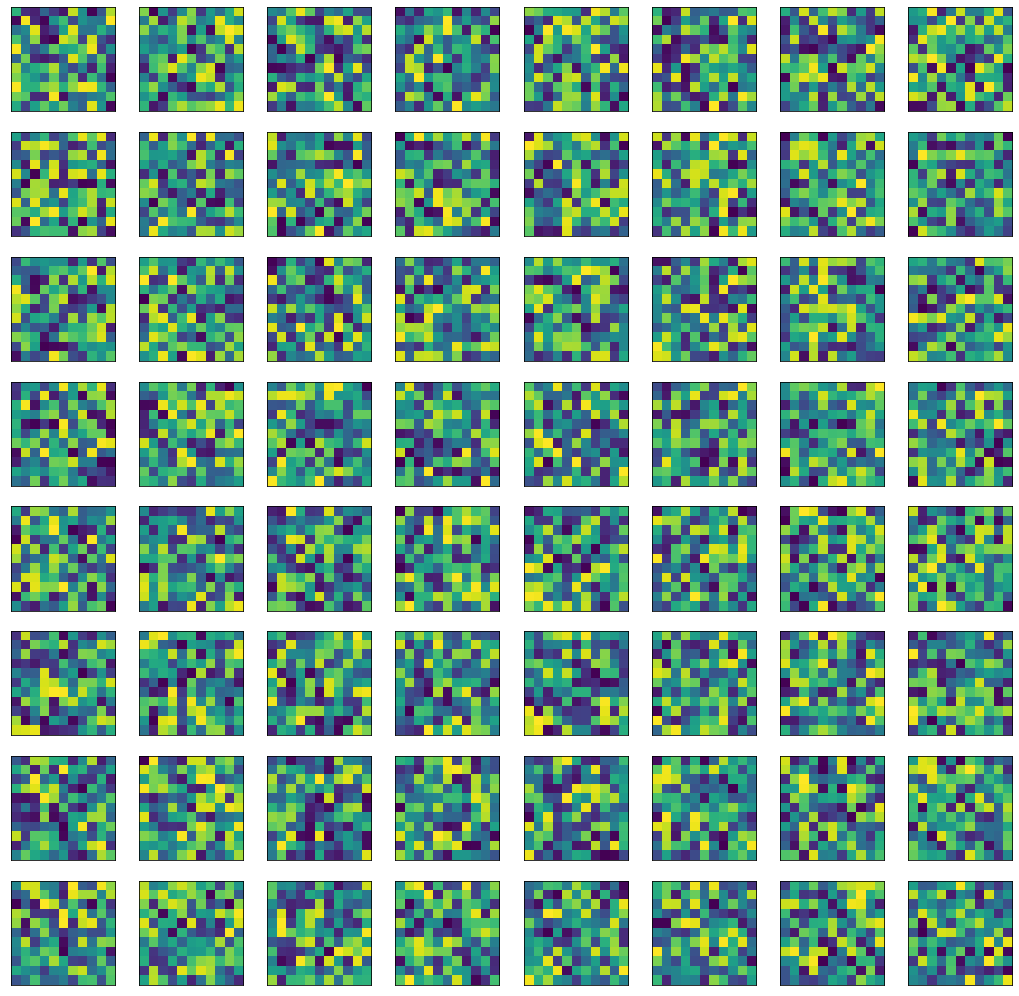

In [77]:
fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
#for i in range(1,n_filters):
for i in range(1,65):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show

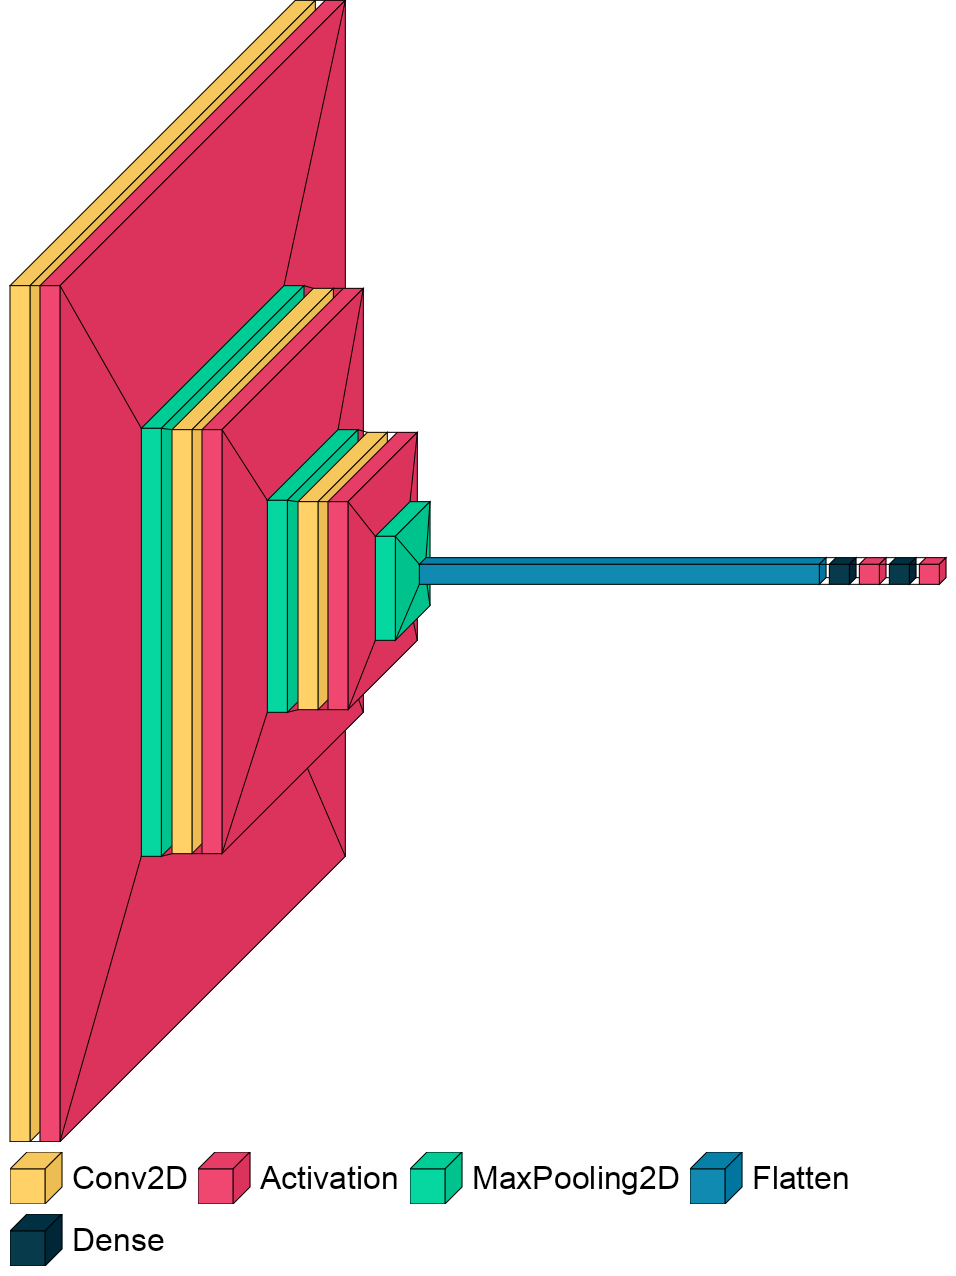

In [68]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model).show() # display using your system viewer
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, to_file='output.png',legend=True, font=font)  # font is optional!

In [69]:

#model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
model.compile(loss ='categorical_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 

train_datagen = ImageDataGenerator( rescale = 1. / 255,	shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
validation_generator = test_datagen.flow_from_directory( validation_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
history=model.fit(train_generator,steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size) 

json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
# Guardar pesos en el disco
model.save_weights('model_saved.h5')



Found 3221 images belonging to 3 classes.
Found 796 images belonging to 3 classes.
Epoch 1/30
100/100 [==============================] - 59s 581ms/step - loss: 1.4348 - accuracy: 0.4283 - val_loss: 0.8872 - val_accuracy: 0.5781
Epoch 2/30
100/100 [==============================] - 58s 581ms/step - loss: 0.9372 - accuracy: 0.5547 - val_loss: 0.8785 - val_accuracy: 0.5807
Epoch 3/30
100/100 [==============================] - 58s 580ms/step - loss: 0.8587 - accuracy: 0.5986 - val_loss: 0.7783 - val_accuracy: 0.6471
Epoch 4/30
100/100 [==============================] - 58s 581ms/step - loss: 0.7742 - accuracy: 0.6469 - val_loss: 0.7829 - val_accuracy: 0.6432
Epoch 5/30
100/100 [==============================] - 58s 579ms/step - loss: 0.7143 - accuracy: 0.6880 - val_loss: 0.7953 - val_accuracy: 0.6198
Epoch 6/30
100/100 [==============================] - 58s 576ms/step - loss: 0.6612 - accuracy: 0.7153 - val_loss: 0.7246 - val_accuracy: 0.6745
Epoch 7/30
100/100 [===========================

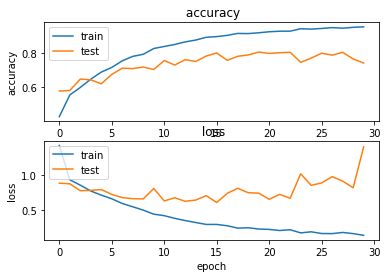

In [70]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])  
 plt.title(' accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title(' loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show()

In [71]:
#### From https://www.youtube.com/watch?v=ho6JXE3EbZ8 #####
print(model.summary())
layer=model.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 activation_24 (Activation)  (None, 214, 214, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 107, 107, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 32)      8224      
                                                                 
 activation_25 (Activation)  (None, 106, 106, 32)      0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

<function matplotlib.pyplot.show(close=None, block=None)>

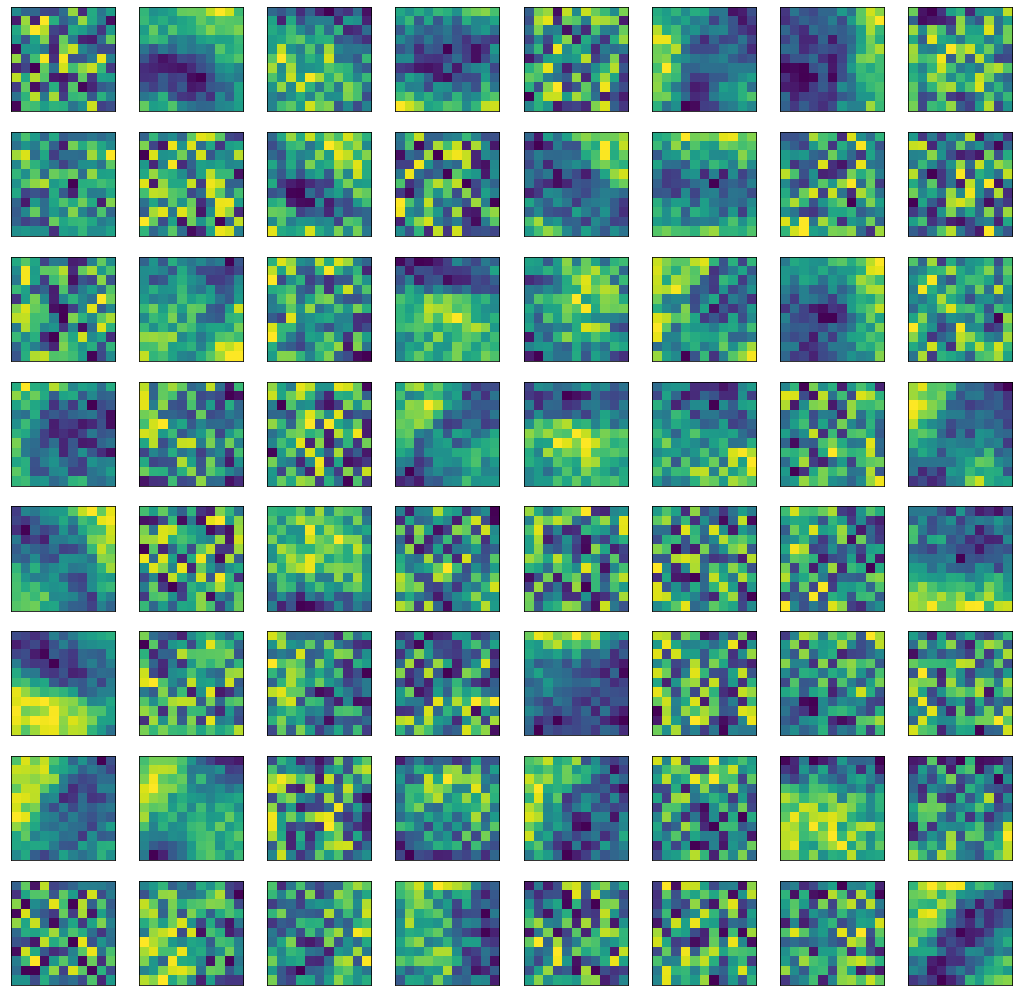

In [72]:
fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
#for i in range(1,n_filters):
for i in range(1,65):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show

In [27]:
model.summary()
model2 = Sequential()
for layer in model.layers[:-3]: # go through until last layer
    model2.add(layer)
model2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 214, 214, 64)      23296     
                                                                 
 activation_15 (Activation)  (None, 214, 214, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 107, 107, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 32)      8224      
                                                                 
 activation_16 (Activation)  (None, 106, 106, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

In [28]:
model2.save('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model_11.11_trainable.h5') 

In [29]:
from tensorflow import keras
model3 = tf.keras.models.load_model('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model_11.11_trainable.h5')
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 214, 214, 64)      23296     
                                                                 
 activation_15 (Activation)  (None, 214, 214, 64)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 107, 107, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 32)      8224      
                                                                 
 activation_16 (Activation)  (None, 106, 106, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

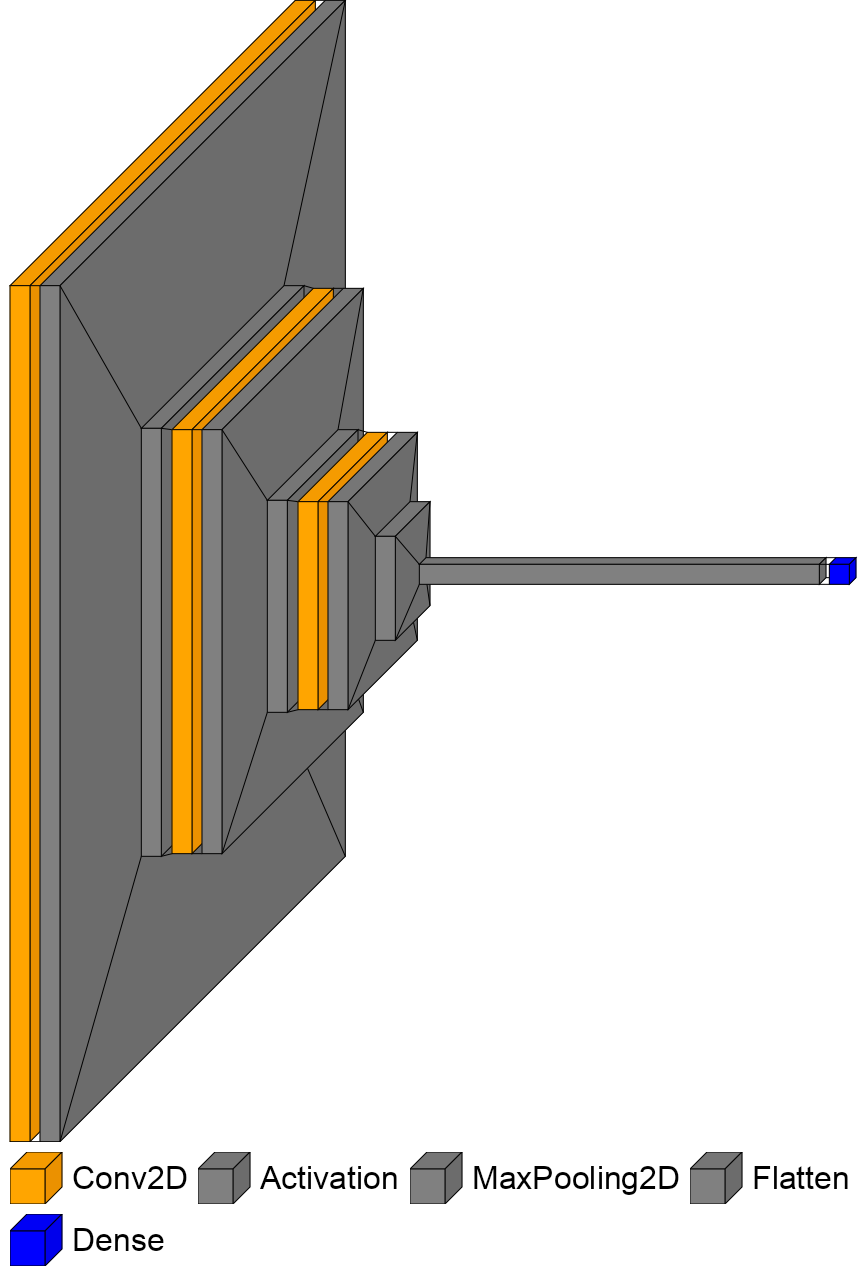

In [30]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Activation]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'gray'
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'gray'

visualkeras.layered_view(model3).show() # display using your system viewer
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model3, to_file='/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data/model_3.3_trainable.output3.png',legend=True, font=font,color_map=color_map)  # font is optional!

In [31]:
model3.build()

(1, 224, 224, 3)

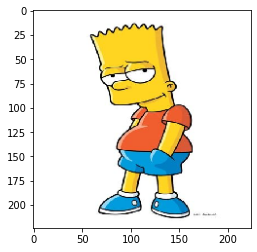

In [32]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
#ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/faces/bart/bart_color3.jpeg',target_size=(224, 224,3))
ima=  tf.keras.preprocessing.image.load_img('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Bart1.jpg',target_size=(224, 224,3))
img = img_to_array(ima)
image = np.expand_dims(img, axis = 0)
plt.imshow(ima)
image.shape


In [33]:
out = model3.predict(image)
#print(out[0,:,:,0])  #if 2D image
print(out/out.max(axis=1))  #if 1D image
out1=(out/out.max(axis=1))
print(255*out1)

[[ 0.25702995 -0.46404684 -0.20798425 -0.28761724 -0.27677757 -0.15839298
  -0.30765328 -0.5849197  -0.71144503 -1.3529711  -1.2894168  -0.8433383
  -0.27944586 -0.73583853 -0.3239415  -0.23777433 -1.0938345  -0.38808534
  -0.34939864 -1.0053917  -0.1739171  -0.6534789  -1.3282474  -3.7386084
   0.16158284  1.         -0.5698037  -0.3412938  -2.764384    0.37768564
  -0.2661597  -0.37252343 -0.27198198 -1.2862263  -1.0072526  -0.16500163
  -0.7894133  -0.17055665 -0.2598422  -0.3606303  -0.4142167  -0.5506908
  -0.36768922 -0.19322556  0.2552178  -0.31737608 -0.36173847  0.5606058
  -0.15652668 -1.0363234   0.07199942 -0.9344539  -1.3797232  -0.40102893
  -0.19914134 -0.4579168  -0.12859891 -0.2838947  -0.11382055 -1.5374092
  -0.11817103 -0.25291693 -1.2571992  -0.16088118]]
[[  65.54264  -118.33194   -53.035984  -73.34239   -70.57828   -40.39021
   -78.451584 -149.15453  -181.41849  -345.00763  -328.80127  -215.05127
   -71.25869  -187.63882   -82.60508   -60.632454 -278.9278    -98.

[[  65.54264  -118.33194   -53.035984  -73.34239   -70.57828   -40.39021
   -78.451584 -149.15453 ]
 [-181.41849  -345.00763  -328.80127  -215.05127   -71.25869  -187.63882
   -82.60508   -60.632454]
 [-278.9278    -98.96176   -89.09666  -256.37488   -44.34886  -166.63713
  -338.7031   -953.34515 ]
 [  41.203625  255.       -145.29994   -87.02992  -704.9179     96.30984
   -67.87073   -94.99348 ]
 [ -69.35541  -327.9877   -256.8494    -42.075417 -201.30038   -43.491947
   -66.25976   -91.960724]
 [-105.62526  -140.42616   -93.76075   -49.27252    65.080536  -80.9309
   -92.24331   142.95448 ]
 [ -39.914303 -264.26248    18.359854 -238.28575  -351.8294   -102.262375
   -50.78104  -116.76878 ]
 [ -32.792725  -72.39314   -29.02424  -392.03934   -30.133612  -64.49382
  -320.5858    -41.0247  ]]


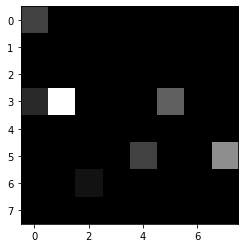

In [34]:
import numpy as np
from PIL import Image
shape = (8,8)
# Set transparency depending on x position
vector = np.matrix(255*out1)
# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)
print(arr2)
# make a PIL image
img2 = Image.fromarray(arr2)
plt.imshow(img2) # followed by 
plt.show()


In [35]:
#np.save("/content/drive/MyDrive/faces/bart/bart_color3.npy", out1)
np.save("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Bart1fixed.npy", out1)
print(out1)

[[ 0.25702995 -0.46404684 -0.20798425 -0.28761724 -0.27677757 -0.15839298
  -0.30765328 -0.5849197  -0.71144503 -1.3529711  -1.2894168  -0.8433383
  -0.27944586 -0.73583853 -0.3239415  -0.23777433 -1.0938345  -0.38808534
  -0.34939864 -1.0053917  -0.1739171  -0.6534789  -1.3282474  -3.7386084
   0.16158284  1.         -0.5698037  -0.3412938  -2.764384    0.37768564
  -0.2661597  -0.37252343 -0.27198198 -1.2862263  -1.0072526  -0.16500163
  -0.7894133  -0.17055665 -0.2598422  -0.3606303  -0.4142167  -0.5506908
  -0.36768922 -0.19322556  0.2552178  -0.31737608 -0.36173847  0.5606058
  -0.15652668 -1.0363234   0.07199942 -0.9344539  -1.3797232  -0.40102893
  -0.19914134 -0.4579168  -0.12859891 -0.2838947  -0.11382055 -1.5374092
  -0.11817103 -0.25291693 -1.2571992  -0.16088118]]


In [ ]:
################################### CNN with fixed Gabor Filters  ######################################

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K
import PIL
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import save
import os
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [41]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [42]:
# show figures inline
%matplotlib inline 

In [43]:
def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    #plt.imshow(I, cmap=plt.gray(), **kwargs)
    plt.imshow(I,  **kwargs)

(101, 101)

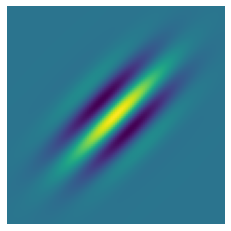

In [44]:
def genGabor(sz, omega, theta, func=np.cos, K=np.pi):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]+1), range(-radius[1], radius[1]+1))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi * K**2) * np.exp(- omega**2 / (8*K**2) * ( 4 * x1**2 + y1**2))
#     myimshow(gauss)
    sinusoid = func(omega * x1) * np.exp(K**2 / 2)
#     myimshow(sinusoid)
    gabor = gauss * sinusoid
    return gabor
        
g = genGabor((100,100), 0.3, np.pi/4, func=np.cos) 
# change func to "cos", "sin" can generate sin gabor or cos gabor, here we pass a function name as a parameter
myimshow(g)
np.mean(g)
g.shape

In [45]:
theta = np.arange(0, np.pi, np.pi/8) # range of theta
omega = np.arange(0.1, 0.9, 0.1) # range of omega
print("Theta shape: %i " % theta.shape)
print("Omega shape: %i " % omega.shape)
params = [(t,o) for o in omega for t in theta]
sinFilterBank = []
cosFilterBank = []
gaborParams = []
for (theta, omega) in params:
    gaborParam = {'omega':omega, 'theta':theta, 'sz':(11, 11)}
    sinGabor = genGabor(func=np.sin, **gaborParam)
    cosGabor = genGabor(func=np.cos, **gaborParam)
    sinFilterBank.append(sinGabor)
    cosFilterBank.append(cosGabor)
    gaborParams.append(gaborParam)

Theta shape: 8 
Omega shape: 8 


64


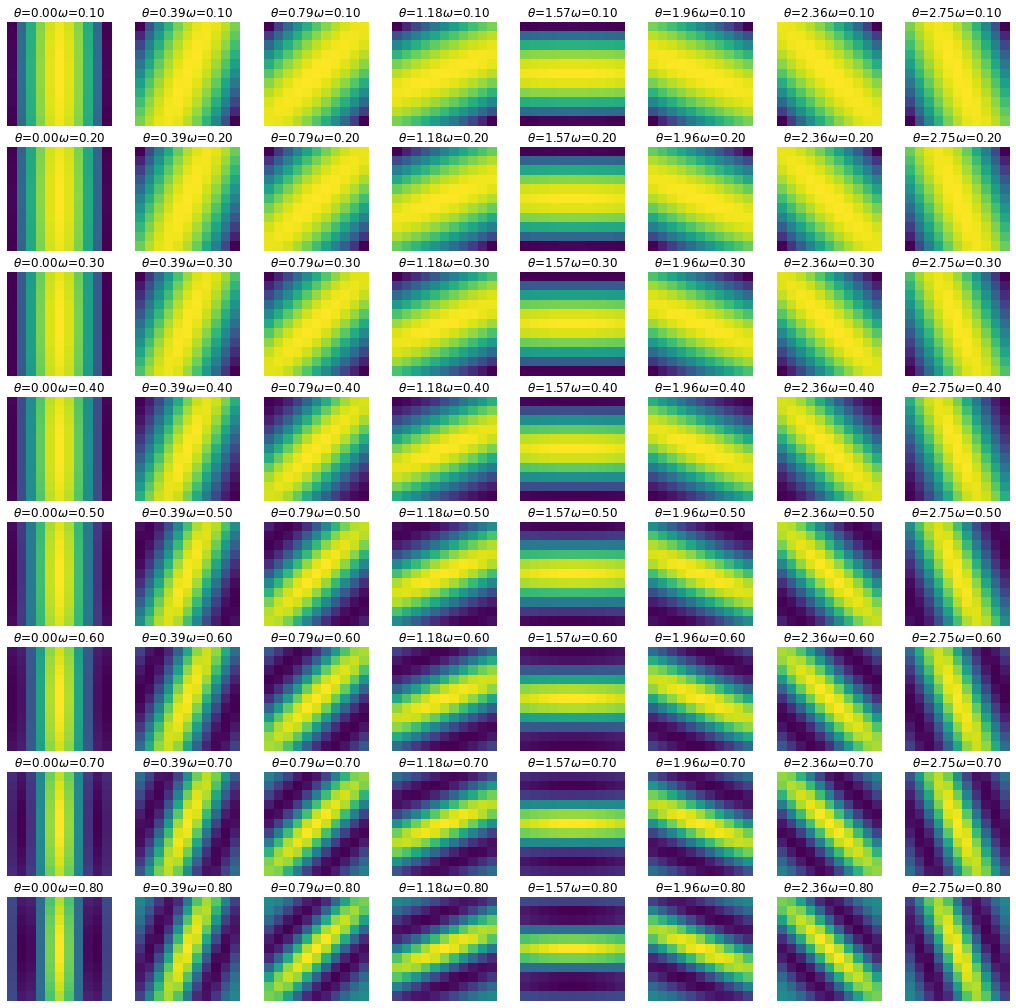

In [46]:
n = len(sinFilterBank)
plt.figure(figsize=(18,18)) #width,length
print(n)
for i in range(n):
    plt.subplot(8,8,i+1)
    plt.title(r'$\theta$={theta:.2f}$\omega$={omega:.2f}'.format(**gaborParams[i]))
    plt.axis('off'); 
    plt.imshow(cosFilterBank[i])

In [47]:
#Initialise to set kernel to required value
Num_kernels= len(sinFilterBank)
def kernel_init(shape,dtype=None):
    kernel = np.zeros(shape)
    #Create the Gabor filters tensor
    for i in range(Num_kernels):
        kernel[:,:,0,i] = np.array(sinFilterBank[i])
    return kernel

#Build Keras model
#Num_kernels
D2=0

In [48]:
#Test the layers without training.
D2=0
model = Sequential()
model.add(Conv2D(Num_kernels, [11,11], kernel_initializer=kernel_init,input_shape=(224,224,1), padding="same",activation='relu'))
model.add(MaxPooling2D((6,6), strides=(3, 3),padding='valid'))
#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
model.build()

In [49]:
#Load an image for test
ima = load_img('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Bart1B.jpg', target_size=(224, 224),color_mode="grayscale") #VGG user 224 as input
# convert the image to an array
ima = img_to_array(ima)
# expand dimensions to match the shape of model input
ima = np.expand_dims(ima, axis=0)

#ima = np.expand_dims(np.expand_dims(np.array(ima),2),0)
#ima.shape
#plt.imshow(ima)

(1, 224, 224, 3)

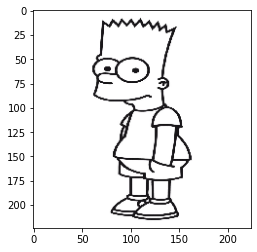

In [50]:
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
#ima=  tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/faces/bart/bart_color3.jpeg',target_size=(224, 224,3))
ima=  tf.keras.preprocessing.image.load_img('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Bart1B.jpg',target_size=(224, 224,3))
img = img_to_array(ima)
image = np.expand_dims(img, axis = 0)
plt.imshow(ima)
image.shape

In [51]:
# To apply existing filter, we use predict with no training
out = model.predict(ima)
#rint(out[0,:,:,0])  #if 2D image
#print(out[0,0])  #if 1D image
#rint(out)
#np.savetxt('test.csv',out, delimiter=',')


if(D2==0):
    n = Num_kernels
    plt.figure(figsize=(20,20)) #width,length
    for i in range(n):
        plt.subplot(8,8,i+1)
        plt.title(r'$\theta$={theta:.2f}$\omega$={omega:.2f}'.format(**gaborParams[i]))
        plt.axis('off')
        image2 = np.array(out[0,:,:,i])
        #mage2 = np.array(out[0,i])
        plt.imshow(image2)

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

In [52]:
img_width, img_height = 224, 224

#train_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\train'
#validation_data_dir = r'C:\Users\ghgv\OneDrive\Documentos\Sistemas Inteligentes\jpeg\v_data\test'
train_data_dir =      r'/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/train'
validation_data_dir = r'/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/test'

nb_train_samples = 20000 #Cat and dogs
nb_train_samples = 3021 #Simpson
nb_validation_samples = 4999 #Cats and dogs
nb_validation_samples = 803 #Simpson
epochs = 26
batch_size = 32

if K.image_data_format() == 'channels_first': 
	input_shape = (3, img_width, img_height) 
else: 
	input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential() 
model.add(Conv2D(Num_kernels, [11,11], kernel_initializer=kernel_init,input_shape=input_shape, activation='relu',trainable=False))
model.add(MaxPooling2D((6,6), strides=(3, 3),padding='valid'))

#model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
#model.add(Activation('relu')) 
#model.add(MaxPooling2D(pool_size =(2, 2))) 
#VGG16 inicio
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#model.add(Flatten(name="flatten"))
#model.add(Dense(256, activation="relu", name="fc1"))
#model.add(Dense(128, activation="relu", name="fc2"))
#model.add(Dense(3, activation="softmax", name="output"))

#Final VGG16
model.add(Flatten()) 
model.add(Dense(256, activation="relu", name="fc1"))
model.add(Dense(64)) 
model.add(Activation('relu')) 

model.add(Dense(3)) 
model.add(Activation('softmax')) 



In [53]:
model = Sequential() 
model.add(Conv2D(Num_kernels, [11,11], kernel_initializer=kernel_init,input_shape=input_shape, activation='relu',trainable=False))
model.add(MaxPooling2D((6,6), strides=(3, 3),padding='valid'))

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 

model.add(Dense(3)) 
model.add(Activation('softmax')) 

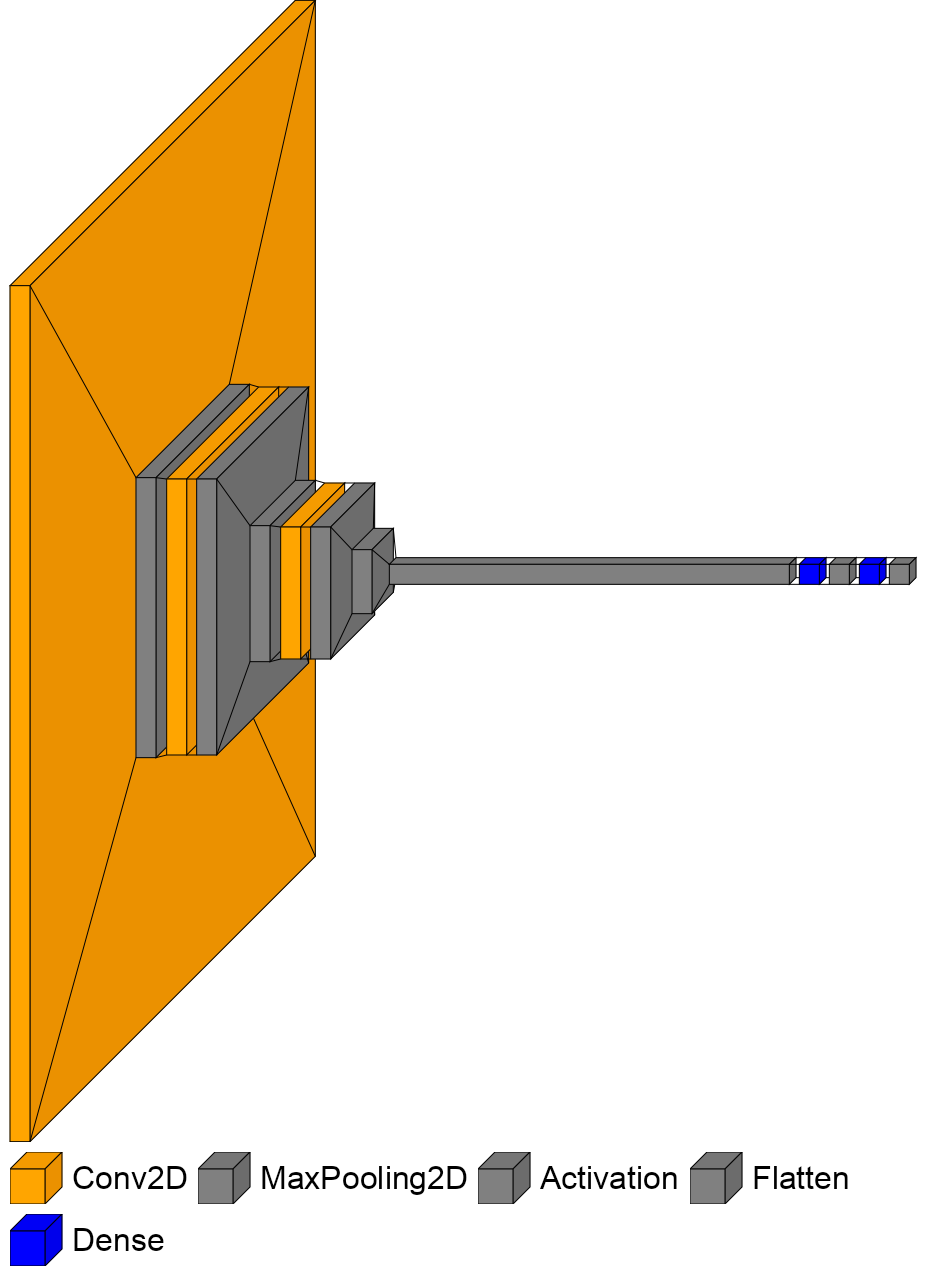

In [54]:
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Activation]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'gray'
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dense]['fill'] = 'blue'
color_map[Flatten]['fill'] = 'gray'

visualkeras.layered_view(model).show() # display using your system viewer
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, to_file='/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/fixed_output.png',legend=True, font=font,color_map=color_map)  # font is optional!

In [55]:
#model.compile(loss ='binary_crossentropy', optimizer ='rmsprop',metrics =['accuracy']) 
model.compile(loss ='categorical_crossentropy', optimizer ='adam',metrics =['accuracy']) 

train_datagen = ImageDataGenerator( rescale = 1. / 255,	shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
validation_generator = test_datagen.flow_from_directory( validation_data_dir,target_size =(img_width, img_height), batch_size = batch_size, class_mode ='categorical') 
history=model.fit(train_generator,steps_per_epoch = nb_train_samples // batch_size, epochs = epochs, validation_data = validation_generator, validation_steps = nb_validation_samples // batch_size) 

json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
# Guardar modelo
model.save('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model_saved_gabor_gabor-relu.h5')

Found 3221 images belonging to 3 classes.
Found 796 images belonging to 3 classes.
Epoch 1/26
94/94 [==============================] - 55s 577ms/step - loss: 1.0996 - accuracy: 0.4751 - val_loss: 0.8816 - val_accuracy: 0.5905
Epoch 2/26
94/94 [==============================] - 54s 574ms/step - loss: 0.8111 - accuracy: 0.6420 - val_loss: 0.7361 - val_accuracy: 0.6822
Epoch 3/26
94/94 [==============================] - 54s 574ms/step - loss: 0.6280 - accuracy: 0.7441 - val_loss: 0.5954 - val_accuracy: 0.7550
Epoch 4/26
94/94 [==============================] - 54s 577ms/step - loss: 0.5447 - accuracy: 0.7763 - val_loss: 0.5612 - val_accuracy: 0.7751
Epoch 5/26
94/94 [==============================] - 54s 578ms/step - loss: 0.4758 - accuracy: 0.8145 - val_loss: 0.5585 - val_accuracy: 0.7638
Epoch 6/26
94/94 [==============================] - 54s 573ms/step - loss: 0.4342 - accuracy: 0.8365 - val_loss: 0.5125 - val_accuracy: 0.7827
Epoch 7/26
94/94 [==============================] - 54s 576

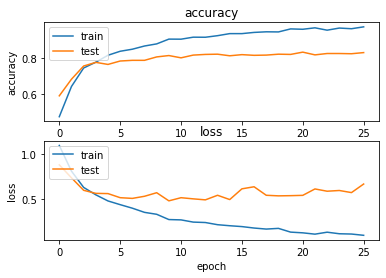

In [56]:
 plt.figure(1)  
   
 # summarize history for accuracy  
   
 plt.subplot(211)  
 plt.plot(history.history['accuracy'])
 plt.plot(history.history['val_accuracy'])  
 plt.title('accuracy')  
 plt.ylabel('accuracy')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
 plt.subplot(212)  
 plt.plot(history.history['loss'])  
 plt.plot(history.history['val_loss'])  
 plt.title('loss')  
 plt.ylabel('loss')  
 plt.xlabel('epoch')  
 plt.legend(['train', 'test'], loc='upper left')  
 plt.show()

In [57]:
#################### Check the filters are preserved
#### From https://www.youtube.com/watch?v=ho6JXE3EbZ8 #####
print(model.summary())
layer=model.layers
filters,biases = model.layers[0].get_weights()
print(layer[1].name,filters.shape)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 70, 70, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 32)        8224      
                                                                 
 activation_20 (Activation)  (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 64)       

<function matplotlib.pyplot.show(close=None, block=None)>

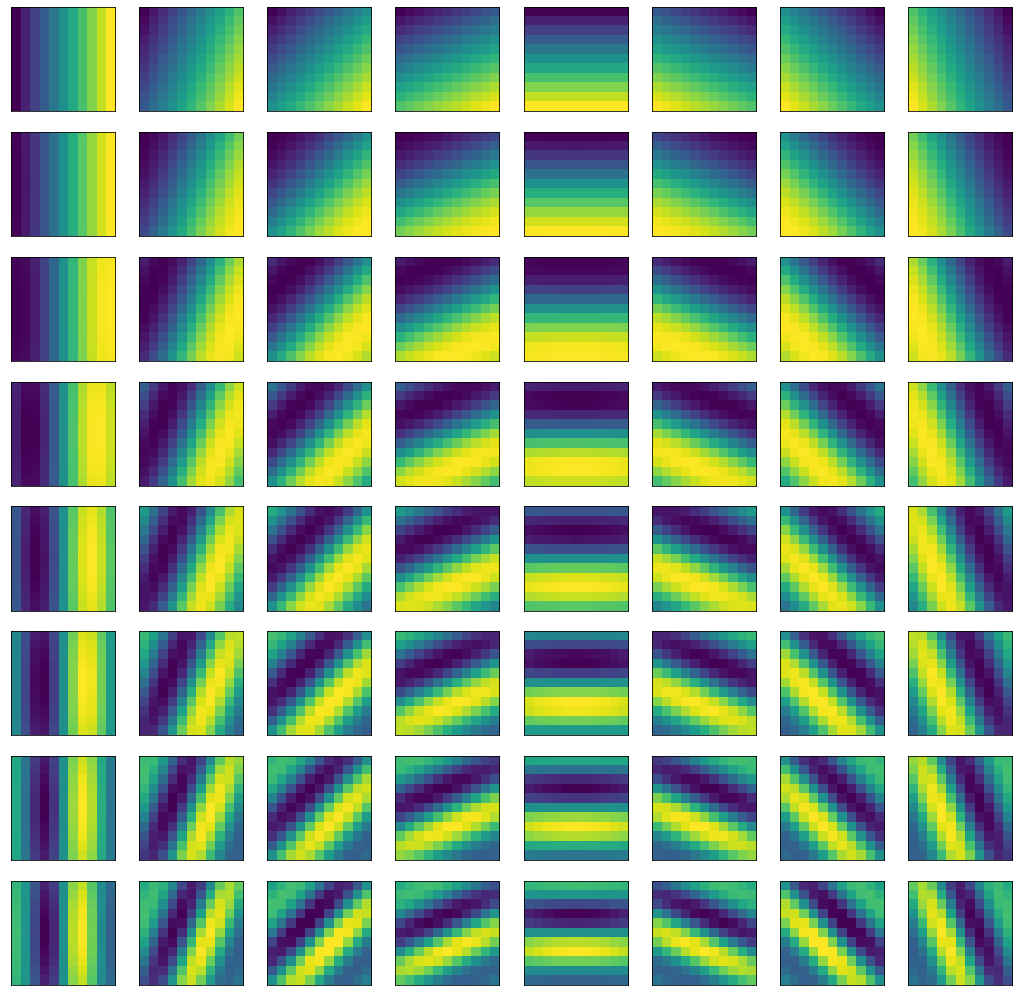

In [58]:

fig1=plt.figure(figsize=(18,18))
columns = 8
rows = 8
n_filters = columns*rows
for i in range(1,n_filters+1):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show



In [59]:
modeli=tf.keras.models.load_model('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model_saved_gabor_gabor-relu.h5',custom_objects={"kernel_init": kernel_init })
modeli.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 70, 70, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 32)        8224      
                                                                 
 activation_20 (Activation)  (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 64)       

In [60]:

model2_gabor = Sequential()
for layer in modeli.layers[:-3]: # go through until last layer
    model2_gabor.add(layer)
model2_gabor.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 70, 70, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 32)        8224      
                                                                 
 activation_20 (Activation)  (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 64)       

In [61]:
model2_gabor.save('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model2_gabor-relu.h5') 

In [62]:
from tensorflow import keras
model3_gabor = tf.keras.models.load_model('/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/model2_gabor-relu.h5',custom_objects={"kernel_init": kernel_init })
model3_gabor.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 214, 214, 64)      23296     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 70, 70, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 69, 69, 32)        8224      
                                                                 
 activation_20 (Activation)  (None, 69, 69, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 34, 34, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 33, 33, 64)       

In [63]:


class vectorizer:
    a = np.empty(64);
    b=  np.array(["***"])
    c = np.empty(65);
    i=0
    save_data=""
    path=""
    names=[]
    update_data_epoch = 1
    initial_lrate = 0.4
    nb_samples=12
    update_data_maxepoch = 1 * nb_samples # 10 presentations of all the samples
    update_data_initial_lrate = initial_lrate
    update_data_lrate = update_data_initial_lrate
    norm1=np.empty([10,64])
    path="/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/"
    def __init__(self,set_):
        i=0
        self.set_=set_
        self.names=[]
        self.save_data=self.path+self.set_+".csv"
    def vector(self,imagen):
        
        self.names.append(imagen)
        file=self.path+imagen+".jpg"
        ima=  tf.keras.preprocessing.image.load_img(file,target_size=(224, 224,3))
        img = img_to_array(ima)
        image = np.expand_dims(img, axis = 0)
        plt.imshow(ima)
        plt.show()
        image.shape
        ## Test the precision of the initial model
        out = modeli.predict(image)  
        if out[:,0]>0.9:
            print("It is Bart")
            print(imagen)
            self.b=  np.array(["Bart"])
        if out[:,1]>0.9:
            print("It is Homer")
            print(imagen)
            self.b=  np.array(["Homer"])
        if out[:,2]>0.9:
            print("It is Lisa")
            print(imagen)
            self.b=  np.array(["Lisa"])
        print(out)
        out = model3_gabor.predict(image)
        print(out/out.max(axis=1))  #if 1D image
        out2=(out-out.min(axis=1))/(out.max(axis=1)-out.min(axis=1))
        #out1=(out)/(out.max(axis=1)-out.min(axis=1))
        #out1= 2.*(out - np.min(out))/np.ptp(out)-1
        out1 = out / np.linalg.norm(out)
        #print(255*out1)
        #print(out1.max(axis=1))
        #print(out1.min(axis=1))
        shape = (8,8)
        # Set transparency depending on x position
        vector = np.matrix(255*out2)
        # reform a numpy array of the original shape
        arr2 = np.asarray(vector).reshape(shape)
        print(arr2)
        # make a PIL image
        img2 = Image.fromarray(arr2)
        plt.imshow(img2) 
        plt.show()
        save_path=self.path+imagen+".npy"
        np.save(save_path, out1)
        self.a=np.append(out1[0],self.b,axis=0)
        #print(self.a)
        if self.i==0:
            self.c = np.vstack([self.a])
            self.i=self.i+1
        else:
            self.c = np.vstack([self.c,self.a])
        
        f=open(self.save_data,'w')
        savetxt(f, self.c, delimiter=',',fmt='%s')
        f.write("\n")
        f.close()
        print(self.c)
        print(self.save_data)
    def save(self):
        self.save_data=self.path+self.set_+".csv"
        #print(self.names)
        names_ = np.expand_dims(self.names, axis=0)
        print(names_)
        print(self.c)
        s=np.append(self.c, np.transpose(names_), axis=1)
        savetxt(self.save_data, s, delimiter=',',fmt='%s')
    #def load(self):
    #    data = loadtxt(self.save_data, delimiter=',')
    #    print(data)
    def pca(self,num_component,ele,azm,dst): 
        
        df = pd.read_csv(self.save_data,header=None)
        df.head()
        x, y = df.iloc[:, :-1], df.iloc[:, [-1]]
        x = StandardScaler().fit_transform(x)
        print("Registros: %i" %len(x))
        pca = PCA(n_components=num_component)
        principalComponents = pca.fit_transform(x)
        if num_component==2:
            principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
        else:
            principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
        finalDf = pd.concat([principalDf, df[[64]]], axis = 1)
        fig = plt.figure(figsize = (14,14))
        if num_component==2:
            ax = fig.add_subplot(1,1,1)  #2D
            ax.set_xlabel('Principal Component 1', fontsize = 15)
            ax.set_ylabel('Principal Component 2', fontsize = 15)
        else:
            ax = fig.add_subplot(111, projection='3d')#3D
            ax.set_xlabel('Principal Component 1', fontsize = 15)
            ax.set_ylabel('Principal Component 2', fontsize = 15)
            ax.set_zlabel('Principal Component 3', fontsize = 15)
            ax.set_title('3 component PCA', fontsize = 20)
        targets = ['Bart', 'Homer', 'Lisa']
        colors = ['r', 'g', 'b']
        #print(finalDf.loc[[1, 1]].index.values[0])
        if num_component==2:
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf[64] == target
                ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                           , finalDf.loc[indicesToKeep, 'principal component 2']
                           , c = color
                           , s = 50)
        else:
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf[64] == target
                ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                           , finalDf.loc[indicesToKeep, 'principal component 2']
                           , finalDf.loc[indicesToKeep, 'principal component 3']
                           , c = color
                           , s = 50)
        
        n = ["Avion",2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
        #print(principalDf.iloc[3,1])
        for i, txt in enumerate(self.names):
            #ax.annotate(txt, (principalDf.iloc[i,0], principalDf.iloc[i,1]))
            ax.text(principalComponents[i,0],principalComponents[i,1],principalComponents[i,2],  '%s' % (self.names[i]), size=10, zorder=1,color='k') 
            #ax.text2D(principalDf.iloc[i,0], principalDf.iloc[i,1], str(i), transform=ax.transAxes)
        ax.legend(targets)
        if num_component==3:
            ax.view_init(elev=ele, azim=azm)
        ax.dist=dst
        ax.grid(True)
        #print(finalDf)
        
        print(pca.explained_variance_ratio_)
    def pca3(self, n_components):
        df = pd.read_csv(self.save_data,header=None)
        df.head()
        x, y = df.iloc[:, :-1], df.iloc[:, [-1]]
        x = StandardScaler().fit_transform(x)
        #print(x)
        pca = PCA(n_components=n_components)
        principalComponents = pca.fit_transform(x)
        print(type(principalComponents))
        for i in range(64):
            name=self.path+str(i)+".npy"
            np.save(name, principalComponents[i]/LA.norm(principalComponents[i]))
            
        PC_values = np.arange(pca.n_components_) + 1
        plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
        plt.title('Screen Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Proportion of Variance Explained')
        plt.show()
        print(pca.explained_variance_ratio_)
        df.close()
    def tnse(self,num_component):
        df = pd.read_csv(self.save_data,header=None)
        df.head()
        #x, y = df.iloc[:, :-1], df.iloc[:, [-1]]
        x, y = df.iloc[:, :-2], df.iloc[:, [-2]]
        self.names=df.iloc[:, [-1]].to_numpy()
        a=np.squeeze(self.names)
        print(self.names)
        tsne = TSNE(n_components=num_component, verbose=1, random_state=123)
        z = tsne.fit_transform(x)
        targets = ['Bart', 'Homer', 'Lisa']
        colors = ['r', 'g', 'b']
        if num_component==2:
            principalDf = pd.DataFrame(data = z, columns = ['principal component 1', 'principal component 2'])
        else:
            principalDf = pd.DataFrame(data = z, columns = ['principal component 1', 'principal component 2','principal component 3'])
        finalDf = pd.concat([principalDf, df[[64]]], axis = 1)
        #p1=sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", 3), data=df).set(title="T-SNE projection")
        fig1=plt.figure(figsize=(14,14))
        ax1 = fig1.add_subplot(1,1,1)
        if num_component==2:
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf[64] == target
                ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                           , finalDf.loc[indicesToKeep, 'principal component 2']
                           , c = color
                           , s = 50)
        else:
            for target, color in zip(targets,colors):
                indicesToKeep = finalDf[64] == target
                ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                           , finalDf.loc[indicesToKeep, 'principal component 2']
                           , finalDf.loc[indicesToKeep, 'principal component 3']
                           , c = color
                           , s = 50)
        for i, txt in enumerate(self.names):
             ax1.text(z[i,0]+0.01, z[i,1], str(a[i]),horizontalalignment='left',size='large', color='black', weight='semibold')
        ax1.legend(targets)
        ax1.grid(True)
        plt.show()
    def update_data(self):
        #weights, presented_example, weights_history, lrate_history,norm1
        self.index_sample = np.random.randint(0,self.nb_samples)
        self.output = np.dot(np.transpose(self.norm1[self.index_sample]) , self.weights)
        print("############  self output ############")
        print(self.output)
        self.weights = self.weights + self.update_data_lrate * ( np.transpose(self.norm1[self.index_sample])*self.output - np.transpose(self.weights)*self.output*self.output)
        self.update_data_epoch = self.update_data_epoch + 1
        self.update_data_lrate = self.update_data_initial_lrate / (float(self.update_data_epoch)/self.nb_samples+1.0)
        return self.weights
    def pca2(self):
        self.weights = 1.0 * (np.random.random([1,64]) - 0.5)#[-0.34878339,-0.9874051, 0.87048954]
        self.weights=np.squeeze(self.weights,axis=0)
        #self.weights = StandardScaler().fit_transform(self.weights)
        print("############## self.weights ################")
        print(self.weights)
        df = pd.read_csv(self.save_data,header=None)
        df.head()
        #x, y = df.iloc[:, :-1], df.iloc[:, [-1]]
        x, y = df.iloc[:, :-2], df.iloc[:, [-2]]
        print(x)
        self.norm1 = StandardScaler().fit_transform(x)
        print(self.norm1)
        
        k=64
        for i in range(k):
            for j in range(100000):
                self.update_data()
            self.weights=self.update_data()    
            self.weights=self.weights/LA.norm(self.weights) #Avoid overflow
            out = np.dot(self.norm1 , self.weights)
            print("##############out #####################")
            print(out.shape)
            print("############## weights #####################")
            print(self.weights)
            #return
            print((self.weights))
            y = np.outer(out,self.weights) 
            self.norm1=self.norm1-y
            self.update_data_epoch = 1
            self.initial_lrate = 0.4
            self.update_data_maxepoch = 1 * self.nb_samples # 10 presentations of all the samples
            self.update_data_initial_lrate = self.initial_lrate
            self.update_data_lrate = self.update_data_initial_lrate
            self.weights = 2.0 * (np.random.random([1,64]) - 0.5)
            self.weights=np.squeeze(self.weights,axis=0)
            #self.weights = StandardScaler().fit_transform(self.weights)
    def dirs(self):
        d = self.path
        listado = [os.path.join(d, o) for o in os.listdir(d) if os.path.isdir(os.path.join(d,o))]
        return listado
        

In [64]:
vector=vectorizer("set1")
#vector.vector("Marge1") #10
print(vector.dirs())

['/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/train', '/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/test']


In [ ]:
vector.vector("Homer4") #0


In [ ]:
vec1=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/avion1.npy")
vec4=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Homer4.npy")
vec5=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Homer5.npy")


In [ ]:
print(np.dot(vec1,vec5.transpose()))

In [ ]:
LA.norm(vec4)

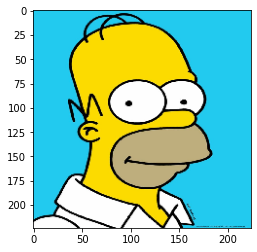

It is Homer
Homer1
[[0. 1. 0.]]
[[-0.45880252 -0.59542406 -0.40435404  0.83683777 -0.5016735   0.13921978
  -0.64282084 -0.41034466 -0.48149294 -0.6101963   0.27441916 -0.6954135
   0.40572718 -1.0333873  -0.370927   -0.6451222  -0.16198124 -0.7347073
  -0.6968009  -0.7144001  -0.74152255 -0.35048774 -0.57514554  0.89824677
  -0.42680112 -0.36070466 -0.7160669  -0.57982844 -0.47846362 -0.74493515
  -0.20559691 -0.6542797  -0.54119414 -0.5238757   1.         -0.82210803
  -0.5830742  -0.29479936 -0.25638393 -0.5384655  -1.2913668  -0.59792423
  -0.48612928 -1.1439496  -0.57674974 -0.20281358 -0.76551706 -0.69973725
  -0.54268914 -0.318665   -0.25757277 -0.4488883  -0.40601104  0.18553834
   0.6749854  -0.5794714  -0.57250506 -0.40982226 -0.90265685 -0.45092112
  -0.7397573  -0.53519535 -0.6861447  -0.49282455]]
[[ 92.65382   77.449585  98.71325  236.84212   87.88283  159.2061
   72.17493   98.04656 ]
 [ 90.12867   75.80562  174.25209   66.32204  188.86499   28.709843
  102.43325   71.91

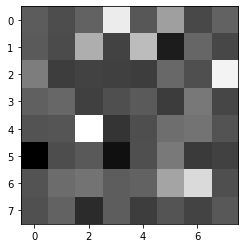

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


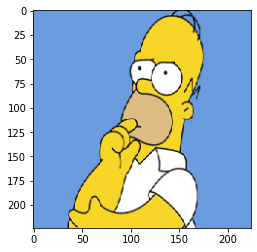

It is Homer
Homer2
[[0. 1. 0.]]
[[-0.34241447 -0.29117188 -0.27299097 -0.55346525 -0.20728573 -1.5096473
  -0.37452808 -0.18269376 -0.30234694 -0.4193165  -0.20445286 -0.38891003
   0.7154577  -0.27904823 -0.33039963 -0.436729   -0.40838638 -0.49154142
  -0.3480124  -0.3424222  -0.46687502 -0.2240606  -0.39786613  0.7011266
  -0.32552865 -0.6019804  -0.49068692 -0.37617224 -0.30399406 -0.9269915
  -0.2058428  -0.43575764 -0.30543345 -0.35873264  1.         -0.46550673
  -0.3920985  -0.30982426 -0.2517671  -0.38547105 -0.92064315 -0.31821838
  -0.39617464 -0.69817924 -0.36676773 -0.16934094 -0.42066038 -0.4517332
  -0.37607428 -0.426582   -0.22277704 -0.346001   -0.6416132   0.0667477
   0.57280433 -0.43447956 -0.4015866  -0.4012889  -0.07699138 -0.3249831
   0.07829031 -0.31657568 -0.40937614 -0.24723549]]
[[118.600075 123.806725 125.65405   97.15565  132.33023    0.
  115.337074 134.82896 ]
 [122.67126  110.786224 132.61807  113.87576  226.08824  125.03858
  119.82088  109.01697 ]
 [1

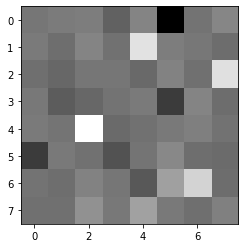

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

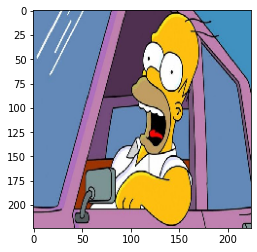

It is Homer
Homer3
[[0. 1. 0.]]
[[-0.43296593 -0.45737657 -0.37092686  0.02162502 -0.3450541  -2.0399535
  -0.52334094 -0.21922435 -0.3954178  -0.53424186 -0.5449463  -0.52810794
   1.         -0.61651087 -0.36745116 -0.57372844 -0.75826555 -0.6496533
  -0.4825429  -0.47903553 -0.6487828  -0.22855698 -0.6322698   0.6971065
  -0.3309368  -0.689153   -0.6617532  -0.47894648 -0.87155956 -1.2978209
  -0.2636903  -0.5047164  -0.4917228  -0.47068036  0.7801871  -0.78003806
  -0.52694046 -0.3303858  -0.3434539  -0.4803886  -1.5037713  -0.39598808
  -0.5086855  -1.1078926  -0.43050206 -0.2764015  -0.5904482  -0.597388
  -0.49757928 -0.4731964   0.00546754 -0.37403822 -0.45744097  0.14498359
   0.5032186  -0.55182517 -0.4729287  -0.41536522  0.17221439 -0.51230955
   0.46013364 -0.44616914 -0.6290073  -0.30542552]]
[[134.7987   132.75107  140.00273  172.9311   142.173      0.
  127.2178   152.72797 ]
 [137.94836  126.303406 125.40549  126.81794  255.       119.402435
  140.29428  122.99116 ]
 [

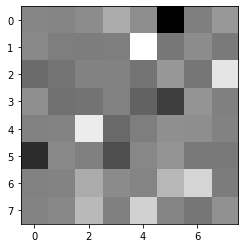

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

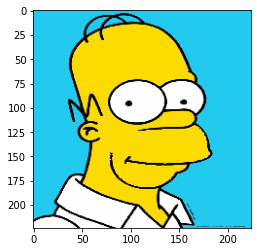

It is Homer
Homer4
[[0. 1. 0.]]
[[-0.46222687 -0.55698425 -0.4075804   1.         -0.5162883  -0.02431484
  -0.6593734  -0.41113964 -0.48346725 -0.63321793  0.28942356 -0.7021999
   0.34123918 -1.0916598  -0.3838282  -0.6732957  -0.05505908 -0.7534426
  -0.7169655  -0.73682404 -0.7620876  -0.3326853  -0.5926366   0.86983114
  -0.42934665 -0.25400543 -0.7420915  -0.5894469  -0.36190516 -0.86524904
  -0.1974494  -0.6546842  -0.53113604 -0.53757787  0.83627856 -0.87888277
  -0.61392546 -0.3088798  -0.2725785  -0.5651929  -1.3024889  -0.61482424
  -0.49204308 -1.172299   -0.5898681  -0.20723894 -0.77650213 -0.71489805
  -0.55276936 -0.3313782  -0.17628627 -0.45910358 -0.39142132  0.09883859
   0.6079557  -0.5941698  -0.5755341  -0.4363028  -0.9186592  -0.46848863
  -0.75789404 -0.56019634 -0.7168808  -0.49434173]]
[[ 93.058784  82.56442   99.110855 255.        87.0715   141.55742
   71.22486   98.71668 ]
 [ 90.70641   74.121574 176.30383   66.48184  182.0424    23.34927
  101.74142   69.68

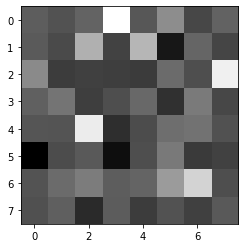

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

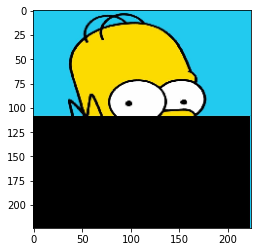

It is Homer
Homer5
[[0. 1. 0.]]
[[-0.3545483  -0.27559048 -0.24923147  0.7800979  -0.33329248  0.7082111
  -0.4728811  -0.26426372 -0.2989832  -0.3895205   0.34031844 -0.48401985
   0.3092141  -0.9566145  -0.2812659  -0.40751773 -0.45319283 -0.542241
  -0.4157742  -0.43184543 -0.51354045 -0.25859645 -0.41512716  1.
  -0.23875391 -0.6614198  -0.43971145 -0.4210218  -0.29273018 -0.23621018
  -0.1121028  -0.49598423 -0.28607675 -0.34615925  0.75453454 -0.9356023
  -0.39875185 -0.19660464 -0.13698007 -0.356718   -1.8899258  -0.3656012
  -0.33109325 -0.71978575 -0.35321862 -0.12163763 -0.5616302  -0.4808661
  -0.3898659  -0.24752094 -0.20113444 -0.31218222 -0.2388138   0.1017806
   0.55951166 -0.39961606 -0.35234737 -0.2722825  -0.66670525 -0.30480483
  -0.17036301 -0.33739346 -0.41181868 -0.30286103]]
[[135.47797  142.445    144.77086  235.59636  137.35353  229.25325
  125.03657  143.44446 ]
 [140.3809   132.3921   196.7913   124.0537   194.04672   82.35312
  141.94423  130.80406 ]
 [126.7

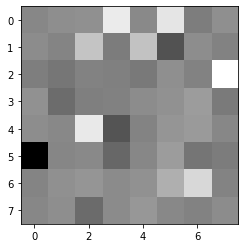

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

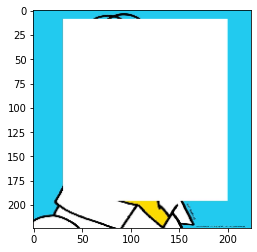

It is Lisa
Homer6
[[0. 0. 1.]]
[[-0.4104626  -0.01185587 -0.445437    0.27097967 -0.5838245   0.631049
  -0.670767   -0.35385418 -0.5159551  -0.6353721   0.16600163 -0.6311237
   1.         -0.18828934 -0.29291087 -0.49853984  0.26989573 -0.63272864
  -0.456727   -0.5950489  -0.559645   -0.42089215 -0.6251389   0.43012154
  -0.43007562  0.26506385 -0.752066   -0.46218857 -0.14736278 -1.325568
  -0.13867015 -0.560453   -0.67148817 -0.45211238 -0.48270202 -0.40722495
  -0.48639044 -0.3718422  -0.04242164 -0.5565615  -0.50088155 -0.48363176
  -0.42505905 -0.9355109  -0.6486697  -0.41751984 -0.64492947 -0.5889895
  -0.5751399  -0.34485808 -0.14804472 -0.59018826 -0.07687339 -0.4937932
  -0.03760333 -0.5996254  -0.6371848  -0.47986194  0.14565133 -0.50372916
  -0.47522804 -0.5841291  -0.57703954 -0.5851065 ]]
[[100.34189  144.04938   96.50693  175.06247   81.33264  214.5443
   71.79935  106.54904 ]
 [ 88.774574  75.68042  163.55157   76.14626  255.       124.70333
  113.231514  90.68417 ]
 

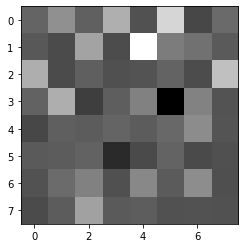

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

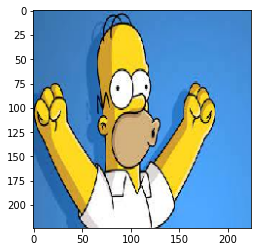

It is Homer
Homer7
[[0. 1. 0.]]
[[-0.6226608  -0.86172545 -0.62348     0.59910536 -0.5918348  -3.290319
  -0.71842676 -0.36530527 -0.48830202 -0.79390305 -0.7921405  -0.80915
  -0.33795163 -1.6063281  -0.64919025 -0.7772667  -0.27513134 -0.93191534
  -0.6821319  -0.71143645 -0.8937482  -0.3867666  -0.65430737  0.40513846
  -0.5600263  -0.7267424  -0.8412977  -0.6843495  -0.5824289  -1.7471284
  -0.30528834 -0.7090118  -0.5749115  -0.72260934  0.26468074 -0.987308
  -0.6537736  -0.41714686 -0.3998784  -0.7156105  -2.9991732  -0.68046874
  -0.6950409  -2.0686266  -0.5347074  -0.4576383  -0.80785763 -0.8453227
  -0.6150117  -0.45057485  0.04897796 -0.6355811  -0.6695621   1.
   0.33367106 -0.71130043 -0.7454255  -0.6382486   0.395783   -0.5764253
  -0.7070415  -0.5894049  -0.735812   -0.4901082 ]]
[[158.55531  144.34622  158.50662  231.17238  160.3875     0.
  152.86336  173.85152 ]
 [166.54108  148.37733  148.4821   147.4711   175.47733  100.08993
  156.97852  149.36613 ]
 [179.21112  14

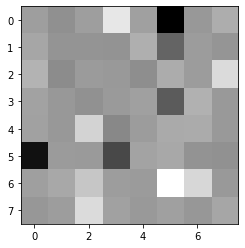

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

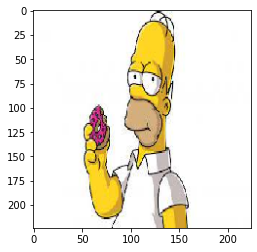

It is Homer
Homer8
[[0. 1. 0.]]
[[-0.52845824 -0.613729   -0.6286451   1.         -0.52215034 -3.2072096
  -0.7377707  -0.2940108  -0.57791173 -0.7868007  -0.29213694 -0.91982394
   0.92044425 -1.1488547  -0.7086075  -0.9115647  -0.2226236  -0.99508905
  -0.7622106  -0.6723237  -0.8397869  -0.3289467  -0.78267175  0.44529846
  -0.56817096 -0.37399584 -0.9695278  -0.6252812  -0.41639152 -1.5279981
  -0.2632784  -0.8651869  -0.5731539  -0.7727091   0.5668553  -0.6100587
  -0.64503807 -0.59681535 -0.3924332  -0.58176106 -2.8825133  -0.7305423
  -0.6411352  -2.2777252  -0.8128662  -0.27122602 -0.8082078  -0.7453505
  -0.79352385 -0.4446116   0.1671801  -0.65516627 -0.68499845  0.9302225
   0.01702539 -0.8802327  -0.75687575 -0.67117494  0.31556085 -0.6368025
  -0.07442978 -0.6061585  -0.8908749  -0.59873956]]
[[162.35977  157.19148  156.28743  255.       162.7421     0.
  149.67328  176.5697  ]
 [159.36238  146.70157  176.68327  138.63899  250.17812  124.75739
  151.44089  139.1396  ]
 [18

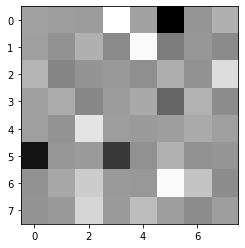

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

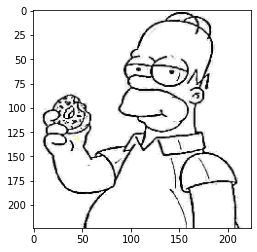

It is Homer
Homer8A
[[0. 1. 0.]]
[[-0.94396067 -1.2517821  -0.7752722  -0.83107525 -0.89138865 -2.3918102
  -1.159287   -0.488385   -0.97543603 -1.3963169  -0.77132803 -1.3532499
   1.         -1.6677085  -1.1072347  -1.3297654  -0.6980373  -1.552102
  -1.093776   -1.1737514  -1.1385942  -0.5857107  -1.3295368   0.98288566
  -0.99574274 -1.198088   -1.430079   -1.0133264  -0.5439575  -2.0262024
  -0.5997217  -1.2737916  -1.1748303  -1.2306952  -0.27453876 -0.39410186
  -1.1370051  -0.5297881  -0.5857211  -1.0926784  -3.0323622  -1.1031162
  -1.1634315  -2.6289604  -1.1388788  -0.6508025  -1.2577418  -1.3995353
  -1.2667562  -0.7336168   0.13170049 -1.0845131  -0.7694771   0.14197883
   0.35039124 -1.4826112  -1.2375125  -1.058605    0.48422235 -1.0079666
  -1.1367018  -1.0769314  -1.3500919  -0.94618106]]
[[132.0671   112.60098  142.7347   139.2058   135.39168   40.507465
  118.450226 160.87697 ]
 [130.07666  103.46083  142.98413  106.18432  255.        86.29848
  121.74193  107.66944 

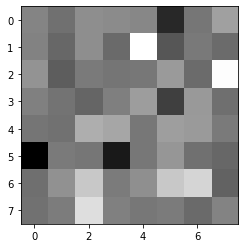

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

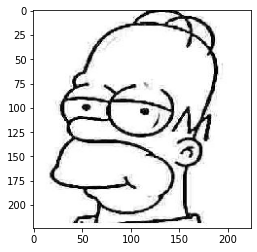

It is Lisa
Homer8B
[[0. 0. 1.]]
[[-0.55514765 -0.01564439 -0.43994117 -0.12198117 -0.51168674 -1.0235903
  -0.647752   -0.34484407 -0.5428765  -0.79540324  0.03294647 -0.7523568
   1.         -1.2677499  -0.584414   -0.71545124 -0.13578899 -0.7787831
  -0.6818151  -0.6283352  -0.63091457 -0.30140913 -0.63745123  0.4879628
  -0.49556038  0.00779544 -0.81510395 -0.6002748  -0.29745114 -0.540379
  -0.19472495 -0.63704205 -0.6002558  -0.5946078  -0.34916198 -0.12096711
  -0.57409686 -0.37416667 -0.29288724 -0.5814667  -2.4747841  -0.6726115
  -0.60633963 -1.3971695  -0.63186836 -0.33027077 -0.7132165  -0.71141416
  -0.57680374 -0.29895774  0.90831804 -0.55727696 -0.38002393  0.10765507
  -0.34450766 -0.6760541  -0.6739267  -0.5272731  -0.31635672 -0.5567633
  -0.40002412 -0.6352519  -0.65331507 -0.558804  ]]
[[140.87416  180.46608  149.32869  172.66245  144.06357  106.4971
  134.07831  156.30746 ]
 [141.77469  123.24279  184.03195  126.401794 255.        88.57925
  138.72643  129.11015 ]
 

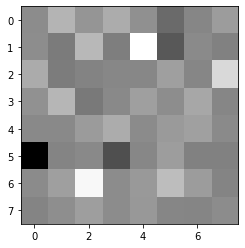

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

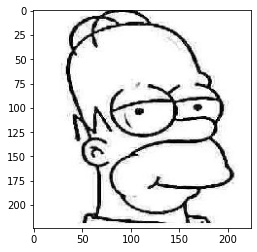

It is Lisa
Homer8C
[[0. 0. 1.]]
[[-0.5279928  -0.05745561 -0.49906966  0.38132462 -0.61172533 -1.351276
  -0.78084725 -0.54007155 -0.6344607  -0.70171416  0.23060243 -0.80357826
   1.         -1.540046   -0.52762085 -0.8178334   0.47631088 -0.9080682
  -0.75309145 -0.9068041  -0.77168465 -0.4818669  -0.7111732   0.6983413
  -0.587967   -0.52355045 -0.97928834 -0.6053574  -0.4952791  -0.9295499
  -0.29822809 -0.7484411  -0.7101181  -0.6330104  -0.12835082 -0.5888538
  -0.69147265 -0.31831828 -0.2633238  -0.77079403 -2.3352745  -0.7994357
  -0.58565    -1.4801546  -0.6988928  -0.37000683 -0.95060766 -0.822025
  -0.7418391  -0.23048136  0.5442859  -0.71147907 -0.17158915 -0.93409425
   0.08576115 -0.7044816  -0.78660107 -0.5605402  -0.11710317 -0.6239433
  -0.4626969  -0.7029333  -0.8291835  -0.64345175]]
[[138.17659  174.1517   140.38792  207.69887  131.77477   75.23207
  118.844475 137.2531  ]
 [130.03653  124.89463  196.17532  117.10655  255.        60.799576
  138.20502  116.016685]
 

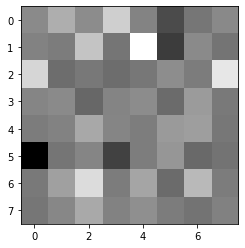

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

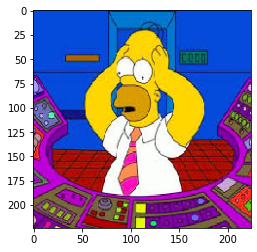

It is Lisa
Homer12
[[0. 0. 1.]]
[[-0.47438633 -1.6201062  -0.51702785  1.         -0.36890298 -0.617009
  -0.7207665  -0.43468162 -0.40031195 -0.7794142  -1.3173392  -0.8571325
  -0.2004056  -1.7918473  -0.5707004  -0.6741833  -0.68837005 -0.8050549
  -0.7143073  -0.7851564  -0.94199866 -0.38189542 -0.61039656  0.85877585
  -0.4771294  -1.3017026  -0.80810916 -0.6562128  -1.2250781  -1.3197831
  -0.32832566 -0.857769   -0.50274825 -0.5707286   0.59391904 -1.265842
  -0.7441071  -0.29906    -0.21717317 -0.56284404 -2.6283727  -0.52599585
  -0.6418369  -1.9669816  -0.6387675  -0.400318   -0.69317627 -0.831068
  -0.50034916 -0.39150688  0.08660176 -0.51989156 -0.65942746 -0.1616834
   0.52289367 -0.73187107 -0.7827122  -0.6094064  -0.73005384 -0.63152117
   0.6619491  -0.5838377  -0.7542416  -0.44711137]]
[[151.38095   70.8604   148.38414  255.       158.79425  141.35753
  134.06549  154.17137 ]
 [156.58687  129.94377   92.138695 124.481766 170.63615   58.790524
  144.61206  137.33932 ]
 

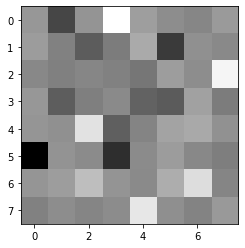

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

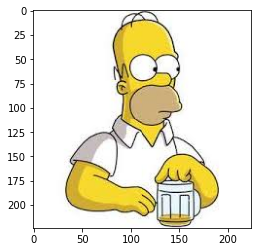

It is Homer
Homer13
[[0. 1. 0.]]
[[-0.7321072  -0.76634014 -0.6424853  -1.4139899  -0.56246203 -2.1699922
  -0.89083254 -0.46627644 -0.66486406 -0.8789804  -1.1801145  -1.0319479
   1.         -1.2865049  -0.859958   -1.0054164  -1.7704438  -1.0549024
  -0.7944559  -0.85594344 -1.0396042  -0.3233189  -0.9501893   0.7544288
  -0.73769796 -1.8325145  -1.143051   -0.7710335   0.15622194 -1.7170656
  -0.2548659  -0.9526575  -0.91195923 -0.8790169   0.82641476 -0.6650666
  -0.80510646 -0.68848634 -0.48240042 -0.7237807  -1.5263542  -0.7816069
  -0.8180713  -2.144312   -0.9010898  -0.45714805 -1.0927619  -0.9497252
  -0.8485117  -0.6923816  -0.3372129  -0.89083856 -0.4698879   0.7911099
   0.85088414 -1.0282447  -0.87380177 -0.77042973 -0.64078903 -0.88728046
  -0.22492956 -0.68973863 -0.94515514 -0.7540911 ]]
[[115.66611   112.912346  122.87546    60.81421   129.31268     0.
  102.89796   137.05003  ]
 [121.07527   103.851364   79.62758    91.54637   255.         71.06934
  105.38155    93.

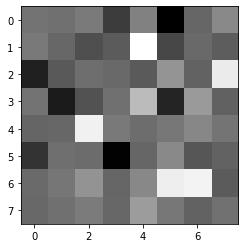

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

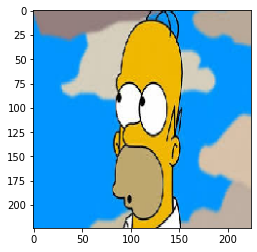

It is Homer
Homer14
[[0. 1. 0.]]
[[-0.5367034   0.53068626 -0.511898    0.6053508  -0.55417615 -2.409034
  -0.60587305 -0.36913568 -0.59820163 -0.7383871   0.08903539 -0.77838707
   0.97831655 -1.4030719  -0.55550355 -0.6653082  -0.72200793 -0.92703736
  -0.8028392  -0.77124393 -0.74076074 -0.34745607 -0.7679423   0.68847823
  -0.5729032  -0.6259262  -0.8460258  -0.6724378  -0.55452424 -0.6880755
  -0.40594462 -0.74536085 -0.7577105  -0.60976094  1.         -0.46277213
  -0.68286514 -0.41951337 -0.18735829 -0.58458775 -1.241673   -0.77116424
  -0.6196575  -1.4369057  -0.6429493  -0.35063568 -0.85046536 -0.79896486
  -0.6593045  -0.4046666   0.38678387 -0.56130743 -0.24914473  0.18041176
   0.64660865 -0.7380074  -0.80171907 -0.5204933  -0.1188988  -0.57067233
   0.31421065 -0.6369163  -0.7958389  -0.59874284]]
[[140.05266  219.89474  141.90813  225.47974  138.74567    0.
  134.8787   152.58694 ]
 [135.45251  124.96647  186.85872  121.97442  253.37805   75.247215
  138.64638  130.43286 

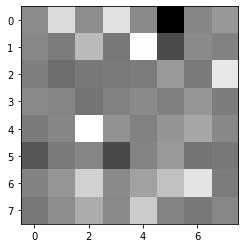

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

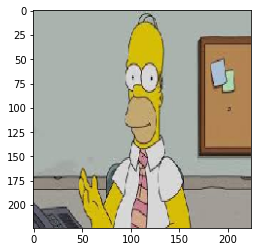

It is Homer
Homer15
[[0. 1. 0.]]
[[-0.4012844  -0.02662    -0.411511    0.42349145 -0.3631914  -2.0303922
  -0.4232646  -0.24393855 -0.3830382  -0.48605052 -0.16169189 -0.48382905
   0.2829552  -0.6134365  -0.480608   -0.52920085 -0.448117   -0.5429069
  -0.4815286  -0.4498956  -0.51517814 -0.2051057  -0.5253873   0.2484104
  -0.31270006 -0.22725338 -0.61175394 -0.3859798  -0.3106815  -0.99175763
  -0.22158076 -0.53608966 -0.52646846 -0.43524432  0.48150527 -0.11705031
  -0.4194964  -0.25206318 -0.23441318 -0.40291417 -0.7378037  -0.39531094
  -0.42167297 -1.0885922  -0.47383595 -0.25277862 -0.5124234  -0.49902216
  -0.44133648 -0.34468484  0.12458658 -0.38675722 -0.47467005  1.
   0.3807516  -0.5563675  -0.4362517  -0.3987942   0.48834792 -0.35421607
   0.17021784 -0.4291401  -0.47692975 -0.37005702]]
[[137.08539  168.61247  136.22485  206.48824  140.29082    0.
  135.23581  150.32565 ]
 [138.62076  129.95253  157.2465   130.13947  194.66245  119.23331
  130.4105   126.32154 ]
 [133.1

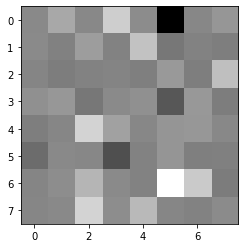

[['-0.094085775' '-0.1221025' '-0.08292013' '0.17160876' '-0.10287725'
  '0.028549539' '-0.13182206' '-0.084148616' '-0.09873886' '-0.12513182'
  '0.056274626' '-0.14260714' '0.083201714' '-0.21191481' '-0.07606531'
  '-0.132294' '-0.03321719' '-0.15066506' '-0.14289166' '-0.1465007'
  '-0.15206265' '-0.071873866' '-0.117944025' '0.18420179' '-0.08752331'
  '-0.07396904' '-0.14684251' '-0.11890434' '-0.09811764' '-0.15276247'
  '-0.042161375' '-0.13417192' '-0.11098167' '-0.10743022' '0.20506814'
  '-0.16858816' '-0.11956994' '-0.060453955' '-0.052576177' '-0.11042211'
  '-0.2648182' '-0.1226152' '-0.099689625' '-0.23458762' '-0.118273'
  '-0.0415906' '-0.15698317' '-0.14349382' '-0.11128826' '-0.06534804'
  '-0.05281997' '-0.09205269' '-0.083259925' '0.038048' '0.13841799'
  '-0.11883112' '-0.117402546' '-0.08404148' '-0.18510616' '-0.09246956'
  '-0.15170066' '-0.109751515' '-0.14070642' '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' '-0.1465631' '-0.05489132'
  '

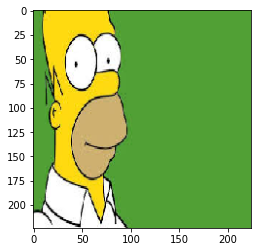

It is Homer
Homer16
[[0. 1. 0.]]
[[-0.24373214 -0.67308336 -0.26501352 -0.32422945 -0.338259    0.20489877
  -0.4124478  -0.21011984 -0.35227776 -0.38289458  0.09482235 -0.47458255
   0.22214618 -0.4666462  -0.36396772 -0.48124087  0.20806578 -0.48269102
  -0.4153467  -0.4554542  -0.36525458 -0.2766729  -0.46859774  0.68114936
  -0.3363567  -0.43046242 -0.43897113 -0.29666218 -0.65350574 -0.53986466
  -0.02650386 -0.43839216 -0.38302734 -0.34077564 -0.32334727  0.0257368
  -0.3819691  -0.17134562 -0.12054154 -0.32924137 -1.0971898  -0.37549698
  -0.33764273 -1.3626711  -0.48812988 -0.13630272 -0.43285695 -0.59483314
  -0.34997383 -0.13270397 -0.74686974 -0.3604941  -0.568269    1.
   0.40552235 -0.5249662  -0.44929937 -0.17324522 -0.32314515 -0.35851997
  -0.9970391  -0.49324682 -0.5210617  -0.3455728 ]]
[[120.765625  74.4263   118.46875  112.077644 110.56346  169.18578
  102.55635  124.39336 ]
 [109.05043  105.745995 157.30536   95.850235 171.04726   96.70679
  107.78875   95.13162 ]


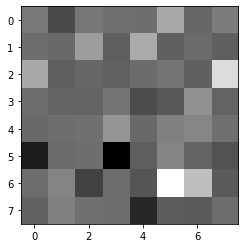

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.090357594' '0.08934457' '-0.08618144' ... '-0.13398479'
  '-0.10080235' 'Homer']
 ['-0.095220074' '-0.006316614' '-0.09764673' ... '-0.11316983'
  '-0.08781018' 'Homer']
 ['-0.06357283' '-0.17556082' '-0.06912367' ... '-0.1359089' '-0.090136'
  'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


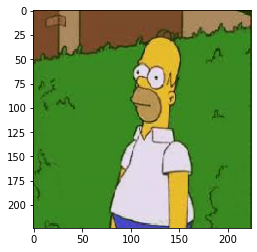

It is Homer
Homer18
[[0. 1. 0.]]
[[-0.21014918 -0.01257501 -0.16091362 -0.468832   -0.16107987 -0.8944292
  -0.29461017 -0.17960525 -0.23670666 -0.34764493  0.04492414 -0.32843623
   0.458738   -0.495532   -0.1890751  -0.33219945 -0.82657725 -0.37717223
  -0.30084914 -0.2690609  -0.35254434 -0.17491558 -0.3161003   0.6189649
  -0.22555685 -0.25771803 -0.36268002 -0.27594888 -0.44504508 -0.25442553
  -0.1597227  -0.29435545 -0.27480397 -0.26827255  1.         -0.33716294
  -0.29062772 -0.14407161 -0.18170346 -0.2549021  -0.26402476 -0.24741805
  -0.22320442 -0.5041799  -0.32910302 -0.11690173 -0.36087492 -0.33242887
  -0.23583491 -0.17863739 -0.3549033  -0.236908   -0.18982156  0.2734919
   0.87459344 -0.33554474 -0.29636255 -0.22314157  0.09286786 -0.30192915
  -0.11613262 -0.20366302 -0.33028764 -0.19452211]]
[[ 92.10765  118.702156  98.735     57.287598  98.71263    0.
   80.73876   96.219025]
 [ 88.53287   73.600006 126.44184   76.18559  182.14333   53.693634
   94.94433   75.67905 

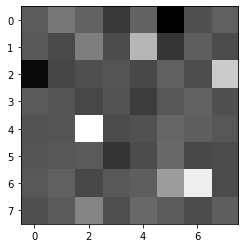

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.095220074' '-0.006316614' '-0.09764673' ... '-0.11316983'
  '-0.08781018' 'Homer']
 ['-0.06357283' '-0.17556082' '-0.06912367' ... '-0.1359089' '-0.090136'
  'Homer']
 ['-0.072467715' '-0.0043363576' '-0.055489358' ... '-0.11389618'
  '-0.06707889' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


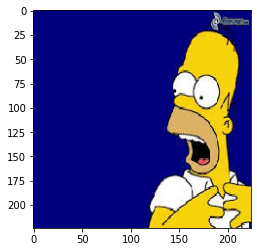

It is Lisa
Homer20
[[0. 0. 1.]]
[[-0.2952808  -0.2936134  -0.2016029  -1.7541887  -0.2272208  -0.766605
  -0.34060848 -0.18458259 -0.33662602 -0.47954237 -0.9077791  -0.34628212
   1.          0.19731513 -0.3051426  -0.34689027 -1.2756305  -0.40924
  -0.36612242 -0.25229737 -0.34754732 -0.13023378 -0.33846873  0.64707375
  -0.20090316 -0.5945779  -0.47554886 -0.2731893   0.07104965 -0.8210167
  -0.13147213 -0.43030798 -0.29059377 -0.2749114   0.2789486  -0.7267896
  -0.33967075 -0.29361793 -0.21605366 -0.26886663 -1.3732728  -0.29700717
  -0.3721909  -0.39220977 -0.29614866 -0.14158224 -0.41524664 -0.31580365
  -0.28260857 -0.301581    0.60652614 -0.2207221  -0.6164707  -1.678807
   0.27366838 -0.37646988 -0.38135636 -0.44642153 -0.37220526 -0.3399862
  -0.28412443 -0.34874937 -0.38816798 -0.28631002]]
[[135.07481  135.22919  143.7481     0.       141.37622   91.43667
  130.87808  145.32394 ]
 [131.2468   118.01472   78.36588  130.3528   255.       180.68242
  134.16174  130.29648 ]
 [

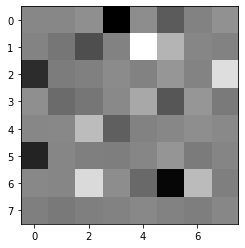

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06357283' '-0.17556082' '-0.06912367' ... '-0.1359089' '-0.090136'
  'Homer']
 ['-0.072467715' '-0.0043363576' '-0.055489358' ... '-0.11389618'
  '-0.06707889' 'Homer']
 ['-0.06664753' '-0.06627118' '-0.045503583' ... '-0.08761299'
  '-0.06462274' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


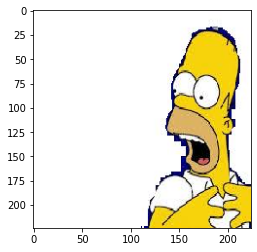

It is Lisa
Homer20A
[[0. 0. 1.]]
[[-0.4103557   0.08318013 -0.247432   -1.6674755  -0.34393105 -1.5920026
  -0.3966079  -0.15386371 -0.3880385  -0.51899874 -0.817871   -0.4618306
   1.         -0.34396067 -0.48691243 -0.45311362 -0.93210804 -0.52652615
  -0.47421682 -0.31502232 -0.45808682 -0.28507552 -0.50602156  0.61798316
  -0.30837494 -0.11917471 -0.5843325  -0.3824321   0.23641044 -0.9206523
  -0.16121627 -0.5888645  -0.48484945 -0.47034952  0.54628485 -0.56910336
  -0.40739056 -0.45610547 -0.17276381 -0.34303808 -1.3520288  -0.45541286
  -0.47750127 -0.76979625 -0.40404162 -0.13867207 -0.5257884  -0.48462874
  -0.30339265 -0.3210944   0.95788616 -0.32946798 -0.6015509  -1.2124506
   0.20212366 -0.55060595 -0.4367934  -0.55178744 -0.48592556 -0.43029433
  -0.4259027  -0.36599326 -0.41268188 -0.35239425]]
[[120.17563  167.35568  135.75049    0.       126.52556    7.214891
  121.48986  144.69524 ]
 [122.30906  109.78977   81.218796 115.25483  255.       126.52273
  112.85712  116.08

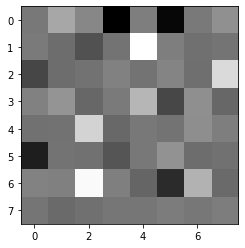

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.072467715' '-0.0043363576' '-0.055489358' ... '-0.11389618'
  '-0.06707889' 'Homer']
 ['-0.06664753' '-0.06627118' '-0.045503583' ... '-0.08761299'
  '-0.06462274' 'Lisa']
 ['-0.0854546' '0.017321862' '-0.051526524' ... '-0.08593902'
  '-0.07338441' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


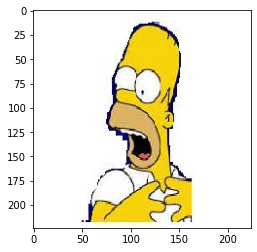

It is Homer
Homer20B
[[0. 1. 0.]]
[[-0.42547694 -0.3109094  -0.3391977   0.35414156 -0.33580473 -1.2704468
  -0.50365776 -0.2730606  -0.4089146  -0.5428914  -0.27963793 -0.52688885
   0.29071385 -0.98841614 -0.35875034 -0.48104292 -0.39949167 -0.5865619
  -0.5376304  -0.52420104 -0.50296676 -0.1126722  -0.46100697  0.33640677
  -0.31268767 -0.5791909  -0.602622   -0.46487144 -0.14168674 -0.9842363
  -0.20753247 -0.5502458  -0.42349103 -0.5171358   0.7362657  -0.67591244
  -0.46274948 -0.3149012  -0.2751996  -0.37365693 -1.1096475  -0.4928841
  -0.49558008 -1.0191342  -0.4536455  -0.27558377 -0.5604368  -0.5719563
  -0.43540683 -0.38360465  0.11844779 -0.33646882 -0.22137529  1.
   0.6005234  -0.5649804  -0.43348643 -0.39714935  0.31397304 -0.48232633
   0.17349155 -0.3587648  -0.532357   -0.39376655]]
[[ 94.90083  107.76823  104.59109  182.4619   104.97217    0.
   86.12015  112.01912 ]
 [ 96.761     81.71371  111.28041   83.510994 175.33815   31.675617
  102.39508   88.66007 ]
 [ 97.8

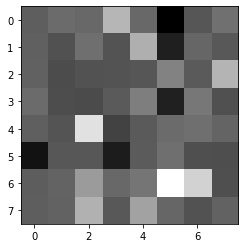

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06664753' '-0.06627118' '-0.045503583' ... '-0.08761299'
  '-0.06462274' 'Lisa']
 ['-0.0854546' '0.017321862' '-0.051526524' ... '-0.08593902'
  '-0.07338441' 'Lisa']
 ['-0.100449875' '-0.07340189' '-0.080080405' ... '-0.12568294'
  '-0.09296344' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


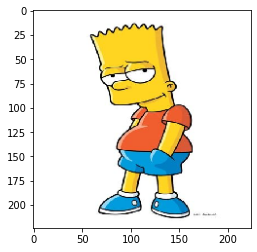

It is Bart
Bart1
[[1. 0. 0.]]
[[-0.4892574   1.         -0.50439864 -0.27909464 -0.5320052  -0.6468719
  -0.5996358  -0.24662353 -0.63881314 -0.7219238   0.967456   -0.71547097
  -0.13608089 -0.5280157  -0.7206226  -0.7696466  -0.35466856 -0.76356333
  -0.6599466  -0.57316065 -0.7440103  -0.44846368 -0.6595676   0.41026467
  -0.47840026  0.34305888 -0.784165   -0.5392305  -0.4030546  -1.0238633
  -0.15391563 -0.5836206  -0.52913624 -0.62318504 -0.4033157   0.205331
  -0.5614065  -0.3329742  -0.26505488 -0.50014675 -2.1194947  -0.68115556
  -0.583521   -0.9959121  -0.6903928  -0.1952627  -0.6867154  -0.6883148
  -0.61608875 -0.29742578  0.16258368 -0.48482475  0.5782258  -0.12388118
   0.1230572  -0.7366067  -0.7226662  -0.54248667 -0.13103986 -0.49192125
  -0.080765   -0.5756093  -0.6177005  -0.6056967 ]]
[[133.26213  255.       132.02443  150.44168  129.76776  120.37809
  124.23936  153.096   ]
 [121.03684  114.24305  252.33972  114.77052  162.1322   130.09387
  114.34942  110.341995]

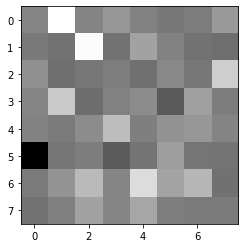

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.0854546' '0.017321862' '-0.051526524' ... '-0.08593902'
  '-0.07338441' 'Lisa']
 ['-0.100449875' '-0.07340189' '-0.080080405' ... '-0.12568294'
  '-0.09296344' 'Homer']
 ['-0.09725993' '0.19879092' '-0.10026987' ... '-0.12279326'
  '-0.12040701' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


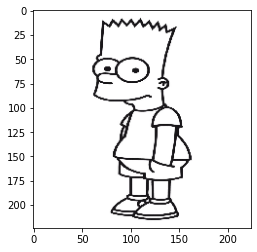

It is Bart
Bart1B
[[1. 0. 0.]]
[[-0.28935528  0.6776248  -0.29853642  0.42610258 -0.29591373 -0.25121412
  -0.45095372 -0.13742177 -0.30288702 -0.455821    1.         -0.47780275
  -0.09533014 -0.83248067 -0.46177658 -0.45333356 -0.48095414 -0.48275146
  -0.48808473 -0.3851767  -0.519867   -0.21179385 -0.4860823  -0.17710833
  -0.4010506   0.3549442  -0.5580523  -0.33959642 -0.46812242 -0.6238375
  -0.14686997 -0.34383082 -0.37891924 -0.42855763 -0.68183583  0.43581864
  -0.37053636 -0.21712539 -0.18698412 -0.35292277 -1.8534174  -0.37842077
  -0.3986257  -0.79245824 -0.4176725  -0.15701649 -0.49169177 -0.37754387
  -0.463085   -0.252732    0.44433022 -0.31081358  0.7385782  -0.29307696
  -0.26594564 -0.49560335 -0.47526857 -0.34584478 -0.270794   -0.32553405
   0.37759015 -0.3574692  -0.46280572 -0.36540496]]
[[139.7748   226.19044  138.9543   203.71278  139.18869  143.18335
  125.333305 153.35257 ]
 [138.56552  124.89832  255.       122.93391  157.11415   91.23757
  124.366104 125.12

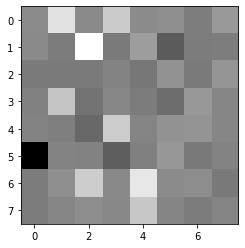

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.100449875' '-0.07340189' '-0.080080405' ... '-0.12568294'
  '-0.09296344' 'Homer']
 ['-0.09725993' '0.19879092' '-0.10026987' ... '-0.12279326'
  '-0.12040701' 'Bart']
 ['-0.073100716' '0.17119044' '-0.07542018' ... '-0.11692003'
  '-0.09231338' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


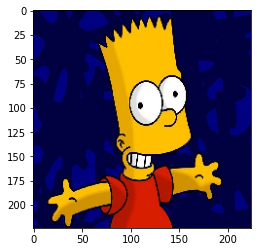

It is Bart
Bart3
[[1. 0. 0.]]
[[-0.48471874  0.8537572  -0.40491432  0.6082128  -0.45819184 -0.42587483
  -0.60465467 -0.30524707 -0.53410244 -0.5580977   1.         -0.6718559
  -0.65530777 -0.9075072  -0.5434748  -0.7678188  -1.0956799  -0.7771504
  -0.63253057 -0.56075853 -0.7081664  -0.38337922 -0.7292367  -0.1560486
  -0.367794    0.9461498  -0.74576896 -0.59517336 -0.20885096 -0.920662
  -0.18993025 -0.6365861  -0.647239   -0.6687178   0.23445688  0.386512
  -0.63123417 -0.32408163 -0.19234724 -0.51969916 -1.4919734  -0.5708642
  -0.5597958  -1.251554   -0.5765511  -0.19426502 -0.6357536  -0.57440716
  -0.6344072  -0.3965756   0.23384872 -0.4446491   0.75253636 -0.50994366
   0.37019384 -0.71503955 -0.60829175 -0.5673464  -0.15323862 -0.6025676
   0.13973092 -0.46656832 -0.7017089  -0.497132  ]]
[[103.0709   240.03517  111.23716  214.909    105.785355 109.09231
   90.79803  121.43597 ]
 [ 98.017525  95.562126 255.        83.92142   85.61477   59.80757
   97.05847   74.10168 ]
 [ 

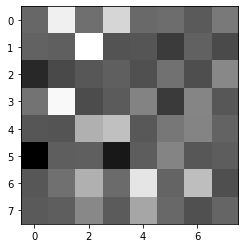

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.09725993' '0.19879092' '-0.10026987' ... '-0.12279326'
  '-0.12040701' 'Bart']
 ['-0.073100716' '0.17119044' '-0.07542018' ... '-0.11692003'
  '-0.09231338' 'Bart']
 ['-0.09638651' '0.16976994' '-0.08051736' ... '-0.13953507'
  '-0.098854885' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


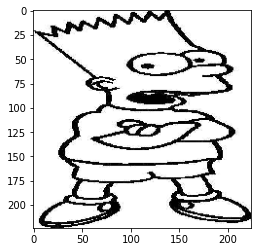

It is Bart
Bart2A
[[1. 0. 0.]]
[[-0.46335265 -0.41850686 -0.49790493 -0.6380933  -0.75051045  1.
  -0.847179   -0.46710613 -0.7465766  -0.8998133   0.26035672 -0.9934347
   0.66884243 -2.2048862  -0.71399176 -0.90599614 -0.15310654 -1.1031451
  -0.8687807  -0.8793458  -1.0063732  -0.39333114 -0.89607185  0.2868532
  -0.5933209   0.03335523 -1.0021104  -0.6863325  -0.5760886  -0.85229224
  -0.342143   -0.7561483  -0.8184158  -0.8800577  -1.2827296   0.3834136
  -0.830266   -0.2949158  -0.4209607  -0.6842989  -3.8270235  -0.9679659
  -0.63958204 -1.6313683  -0.66319543 -0.41985947 -0.98166764 -1.0201663
  -0.8662014  -0.3501582   0.5918328  -0.7370927  -0.08263387 -1.5356003
  -0.49442038 -0.95770913 -0.839848   -0.5207201  -0.06599514 -0.6567795
  -0.6823807  -0.8114874  -1.0138419  -0.66418225]]
[[177.69461  180.0637   175.86931  168.46349  162.52475  255.
  157.41798  177.49632 ]
 [162.73256  154.63745  215.92642  149.69165  237.50574   85.6936
  164.45396  154.31084 ]
 [194.08417  14

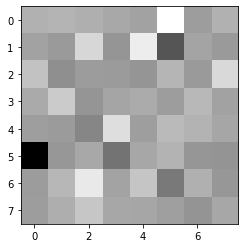

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.073100716' '0.17119044' '-0.07542018' ... '-0.11692003'
  '-0.09231338' 'Bart']
 ['-0.09638651' '0.16976994' '-0.08051736' ... '-0.13953507'
  '-0.098854885' 'Bart']
 ['-0.061789755' '-0.05580941' '-0.06639743' ... '-0.13519949'
  '-0.08857111' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


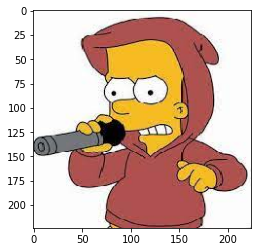

It is Homer
Bart5
[[0. 1. 0.]]
[[-0.62351376 -0.38802567 -0.5591543  -1.5218501  -0.5885369  -2.027998
  -0.9609631  -0.50900495 -0.81594545 -1.0339042  -0.51980793 -0.940452
   0.86339444 -1.6971724  -0.7082726  -0.9834067  -0.9341045  -1.0795119
  -0.85695994 -0.8300302  -0.91994005 -0.4810524  -0.9465935   1.
  -0.5810077  -0.7029697  -1.1313721  -0.7869145  -0.961563   -1.2326304
  -0.41669506 -0.94203496 -0.6969725  -0.8245965   0.48759082  0.02833332
  -0.81002957 -0.59696066 -0.40337452 -0.8482849  -3.4569778  -0.8708788
  -0.8764609  -2.5067353  -0.92177236 -0.36913535 -1.0533857  -0.96061546
  -0.77611953 -0.634446    0.5150952  -0.78929025 -0.3649301   0.11115853
   0.28999394 -0.8251     -0.9060805  -0.7437937  -0.13929722 -0.76442564
  -0.7195783  -0.7740666  -0.92961377 -0.7181699 ]]
[[162.11285  175.58597  165.79507  110.71574  164.114     81.75717
  142.80614  168.66432 ]
 [151.10313  138.6329   168.04623  143.97966  247.18431  100.684906
  157.26349  141.52205 ]
 [144.3

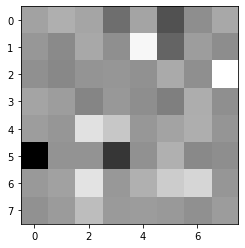

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.09638651' '0.16976994' '-0.08051736' ... '-0.13953507'
  '-0.098854885' 'Bart']
 ['-0.061789755' '-0.05580941' '-0.06639743' ... '-0.13519949'
  '-0.08857111' 'Bart']
 ['-0.07866682' '-0.04895601' '-0.07054678' ... '-0.11728652'
  '-0.090609305' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


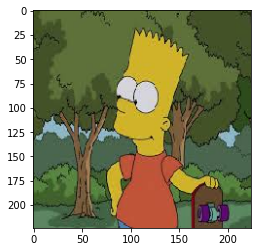

It is Bart
Bart6
[[1. 0. 0.]]
[[-0.32485276  0.7861567  -0.35799956  0.78536606 -0.42835784 -1.3467307
  -0.51288295 -0.25133795 -0.44823727 -0.5564551   0.78474885 -0.5527998
  -0.23869094 -0.97541517 -0.42515022 -0.5752651  -0.85917574 -0.63054234
  -0.5326374  -0.532078   -0.5201801  -0.30681443 -0.61809695 -0.5174694
  -0.34506568  0.89429003 -0.70608526 -0.38263425 -0.7065218  -0.6697624
  -0.166813   -0.5665623  -0.5057269  -0.50529313 -0.40019011  1.
  -0.48203668 -0.31226376 -0.20993242 -0.46871394 -1.4628813  -0.5082006
  -0.42128366 -1.5297561  -0.53229845 -0.20522237 -0.56072456 -0.5493733
  -0.47964114 -0.39333063  0.45600098 -0.45392102  0.73139876 -1.134655
  -0.23000455 -0.5466423  -0.52716094 -0.4187509   0.961675   -0.5075137
   0.0672973  -0.4425245  -0.6231325  -0.41705608]]
[[121.45452  233.44455  118.11332  233.36484  111.021194  18.44899
  102.501045 128.86484 ]
 [109.017334  98.10896  233.30261   98.47742  130.13966   55.87769
  111.34452   96.212906]
 [ 67.59465

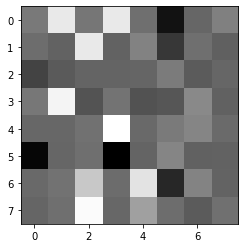

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.061789755' '-0.05580941' '-0.06639743' ... '-0.13519949'
  '-0.08857111' 'Bart']
 ['-0.07866682' '-0.04895601' '-0.07054678' ... '-0.11728652'
  '-0.090609305' 'Homer']
 ['-0.06393671' '0.1547294' '-0.07046058' ... '-0.12264339' '-0.08208394'
  'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


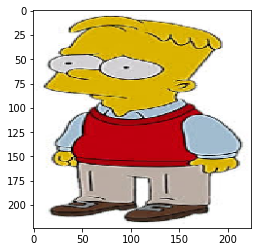

It is Bart
Bart7
[[1. 0. 0.]]
[[-0.8299292   0.1623482  -0.83089167 -2.6911728  -1.0766027  -0.08912056
  -1.4621353  -0.57201475 -1.204893   -1.4017389  -0.48364922 -1.6085844
   0.1898147  -2.4208796  -1.1972833  -1.5550629  -1.8323938  -1.7194443
  -1.3302815  -1.3281354  -1.6034206  -0.9813844  -1.5803626   0.88026845
  -0.9605985  -0.42148423 -1.5413268  -1.2782207   1.         -2.0530012
  -0.36827713 -1.3218545  -1.1430217  -1.4038419  -0.15003276 -0.15339999
  -1.3426756  -0.62458384 -0.47664836 -1.2284553  -4.6692314  -1.4113036
  -1.061761   -3.1717243  -1.3263052  -0.5338985  -1.5619526  -1.5974494
  -1.3782473  -0.7465033   0.23791696 -1.3259318  -0.15372436 -0.46882543
  -0.37226278 -1.4451343  -1.4621737  -0.9341566  -0.38655075 -1.3079232
  -1.7073467  -1.1553789  -1.7149355  -1.3136132 ]]
[[172.69043  217.32271  172.64714   88.972374 161.59514  206.01173
  144.25403  184.29134 ]
 [155.82469  146.97064  188.26599  137.66681  218.55815  101.13005
  156.16698  140.07417 ]


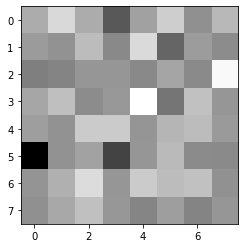

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07866682' '-0.04895601' '-0.07054678' ... '-0.11728652'
  '-0.090609305' 'Homer']
 ['-0.06393671' '0.1547294' '-0.07046058' ... '-0.12264339' '-0.08208394'
  'Bart']
 ['-0.073665656' '0.014410249' '-0.07375109' ... '-0.15222004'
  '-0.11659811' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


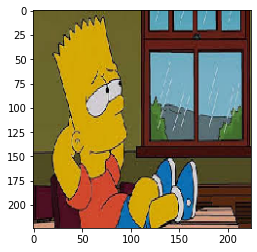

It is Homer
Bart8
[[0. 1. 0.]]
[[-0.34439388 -0.39462894 -0.4552363  -0.04311907 -0.53855723 -0.42861935
  -0.5606094  -0.3774414  -0.5029323  -0.6313033   0.43385163 -0.7229674
  -0.244704   -1.2138987  -0.56306374 -0.7891962  -0.07066654 -0.7456005
  -0.6592332  -0.5667764  -0.6571732  -0.3926509  -0.6362218  -0.5420675
  -0.5262808  -0.03422962 -0.74387616 -0.53394    -0.54019105 -0.76548713
  -0.16131733 -0.52517194 -0.62961316 -0.56289965 -0.6867846   0.15038459
  -0.5625332  -0.280192   -0.2772427  -0.5291159  -3.2104204  -0.63151497
  -0.5947521  -1.4933946  -0.5689634  -0.28806412 -0.6389789  -0.69530106
  -0.6069818  -0.3304354  -0.21086122 -0.5075373   0.42432326  1.
   0.1303069  -0.61823744 -0.6510066  -0.502269   -0.5127709  -0.47590378
  -0.9863537  -0.5728409  -0.728446   -0.48748845]]
[[173.5781  170.53566 166.86504 191.82451 161.8188  168.47707 160.48322
  171.57661]
 [163.97636 156.20172 220.71178 150.65016 179.61572 120.9174  160.33456
  146.63908]
 [190.15613 149.27

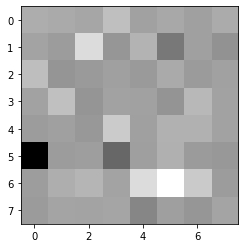

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06393671' '0.1547294' '-0.07046058' ... '-0.12264339' '-0.08208394'
  'Bart']
 ['-0.073665656' '0.014410249' '-0.07375109' ... '-0.15222004'
  '-0.11659811' 'Bart']
 ['-0.06060839' '-0.06944904' '-0.080115065' ... '-0.12819606'
  '-0.085790984' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


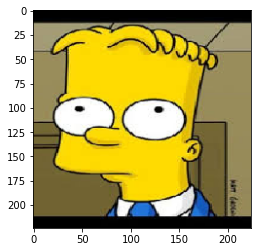

It is Bart
Bart9
[[1. 0. 0.]]
[[-0.4919292   0.38707113 -0.3808663   0.2584234  -0.39974678 -0.47118217
  -0.72110003 -0.29321724 -0.5060582  -0.6813158   0.47583032 -0.70973444
   0.00345229 -0.8066417  -0.41723013 -0.71968347  0.15606192 -0.6634329
  -0.679971   -0.6632804  -0.7589773  -0.3122794  -0.66045946 -0.21196342
  -0.45135638  0.75897336 -0.7430154  -0.5365494   0.14377633 -0.47820497
  -0.26348713 -0.6316492  -0.535678   -0.5332357  -0.9082362   0.21762007
  -0.6634016  -0.38576514 -0.16910915 -0.57201344 -1.8913673  -0.62445945
  -0.61162734 -1.3301159  -0.59381866 -0.36909515 -0.72818327 -0.6921132
  -0.5692825  -0.49100646  1.         -0.49514705  0.42733005 -0.21895978
  -0.36568952 -0.7160074  -0.6589911  -0.50661504  0.06933707 -0.5297412
  -0.6330095  -0.5186138  -0.6772938  -0.41913623]]
[[123.42144  200.94363  133.21648  189.59773  131.55135  125.2512
  103.21005  140.94655 ]
 [122.175354 106.71877  208.77162  104.212425 167.11092   95.665825
  130.00943  103.33498

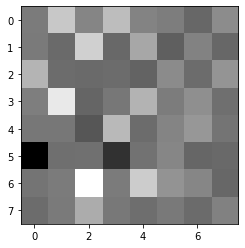

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.073665656' '0.014410249' '-0.07375109' ... '-0.15222004'
  '-0.11659811' 'Bart']
 ['-0.06060839' '-0.06944904' '-0.080115065' ... '-0.12819606'
  '-0.085790984' 'Homer']
 ['-0.099981986' '0.078670144' '-0.077409044' ... '-0.13765635'
  '-0.085187204' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


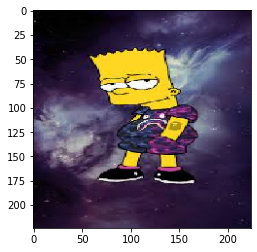

It is Bart
Bart10
[[1. 0. 0.]]
[[-0.35723507  1.         -0.33226866  0.55621123 -0.1806272  -0.7621677
  -0.37087634 -0.19361873 -0.24060693 -0.46422157  0.6195185  -0.43512192
  -0.52910244 -1.12227    -0.5011278  -0.45292825 -0.6980695  -0.5089921
  -0.3466547  -0.35337615 -0.5165227  -0.17439635 -0.44844353 -0.3916388
  -0.30385044  0.52705    -0.47399387 -0.39742258  0.10305521 -0.79915583
  -0.17507562 -0.47428468 -0.40089506 -0.46689788 -0.30433568  0.66956943
  -0.47806433 -0.35161412 -0.16110079 -0.37198576 -2.1674016  -0.4043616
  -0.4558322  -1.5444367  -0.3764186  -0.18825643 -0.4838125  -0.4624087
  -0.350833   -0.38457328  0.44746667 -0.3220405   0.7022191  -0.62375015
  -0.23714323 -0.53935045 -0.3694611  -0.36742243 -0.04353972 -0.41635472
   0.71738505 -0.3312729  -0.48971337 -0.25517437]]
[[145.73222  255.       147.74222  219.27162  159.9505   113.13206
  144.634    158.90459 ]
 [155.12169  137.119    224.36833  139.46175  131.89558   84.141075
  134.14777  138.0282 

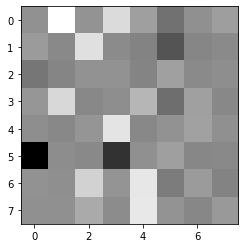

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06060839' '-0.06944904' '-0.080115065' ... '-0.12819606'
  '-0.085790984' 'Homer']
 ['-0.099981986' '0.078670144' '-0.077409044' ... '-0.13765635'
  '-0.085187204' 'Bart']
 ['-0.07763306' '0.21731645' '-0.07220744' ... '-0.106422774'
  '-0.05545359' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


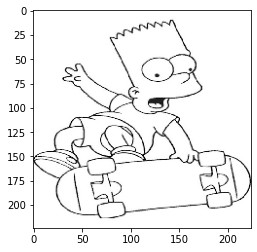

It is Bart
Bart11
[[1. 0. 0.]]
[[-0.9512512  -0.2806499  -0.87315255 -0.8715857  -0.9694256  -2.7213082
  -1.5719169  -0.58452463 -1.1949611  -1.5752326   0.29860762 -1.6279062
   0.5114936  -2.7083235  -1.405266   -1.6130505  -1.0197147  -1.9433427
  -1.4515097  -1.313106   -1.5207045  -0.86117923 -1.5064826   0.78115195
  -0.998578   -0.8738679  -1.8008946  -1.1070429  -0.0479592  -2.716791
  -0.4671986  -1.3974247  -1.2989991  -1.479529   -0.8871247   0.09650332
  -1.254273   -0.7902997  -0.49336836 -1.196095   -6.435821   -1.5758389
  -1.3305373  -3.34266    -1.401806   -0.39732683 -1.5002772  -1.5967214
  -1.4166646  -0.78226846  0.7041117  -1.213321    0.12280908 -0.81313056
   0.20828502 -1.7760664  -1.4512777  -1.1962606   1.         -1.1645948
  -0.8204057  -1.1885701  -1.5802443  -0.8903428 ]]
[[188.08484  211.08208  190.76312  190.81685  187.4616   127.383484
  166.8001   200.66116 ]
 [179.72719  166.68637  230.94682  164.88     238.24742  127.82877
  172.5151   165.38947 ]


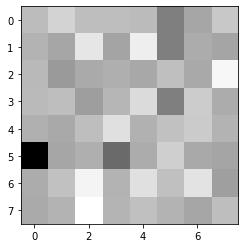

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.099981986' '0.078670144' '-0.077409044' ... '-0.13765635'
  '-0.085187204' 'Bart']
 ['-0.07763306' '0.21731645' '-0.07220744' ... '-0.106422774'
  '-0.05545359' 'Bart']
 ['-0.07643213' '-0.022549953' '-0.07015698' ... '-0.12697113'
  '-0.071538195' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


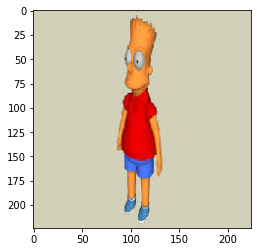

It is Bart
Bart12
[[1. 0. 0.]]
[[-0.38229358  0.3570732  -0.6223761   0.6209647  -0.48177555 -3.133503
  -0.64224297 -0.16045548 -0.41097713 -0.70859665 -0.1648993  -0.6476472
  -1.1447433  -1.0818663  -0.6907114  -0.64261    -2.1053076  -0.9196916
  -0.69646746 -0.5706858  -0.65925753 -0.40919268 -0.724076   -0.1173031
  -0.42180198  0.07279697 -0.7525403  -0.50555867 -0.4759608  -1.7811311
  -0.23201549 -0.708791   -0.6846178  -0.4766834   0.394808   -0.04497987
  -0.53731126 -0.5966794  -0.1935186  -0.46008748 -1.8454872  -0.62983245
  -0.5129401  -1.2710471  -0.6068913  -0.24724329 -0.70789534 -0.5551466
  -0.598593   -0.52140343 -0.43648386 -0.41702548  0.5482972   0.87253255
   0.40560675 -0.66746384 -0.72843623 -0.5835139   1.         -0.5909891
   0.14940709 -0.5543304  -0.63746107 -0.55430037]]
[[169.72491 215.33719 154.91397 231.61693 163.58775   0.      153.68835
  183.41032]
 [167.95538 149.59494 183.13617 153.35497 122.6886  126.56755 150.6983
  153.66571]
 [ 63.43042 136.

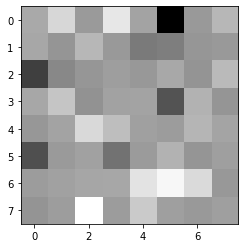

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07763306' '0.21731645' '-0.07220744' ... '-0.106422774'
  '-0.05545359' 'Bart']
 ['-0.07643213' '-0.022549953' '-0.07015698' ... '-0.12697113'
  '-0.071538195' 'Bart']
 ['-0.058427494' '0.05457296' '-0.09512029' ... '-0.09742579'
  '-0.08471599' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


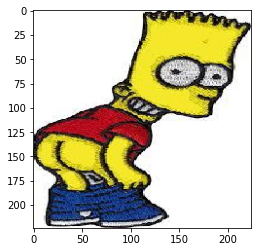

It is Bart
Bart13
[[1. 0. 0.]]
[[-0.41643873 -0.27827597 -0.39192244 -0.04693057 -0.39027342 -1.6623397
  -0.6391481  -0.30342966 -0.42695946 -0.71098256  0.2406038  -0.6714491
   0.36314172 -1.0218884  -0.5396894  -0.61263144 -0.6422459  -0.72013193
  -0.5340881  -0.60890186 -0.54067266 -0.31933865 -0.4472738   0.02868378
  -0.4296722   0.07101452 -0.74392176 -0.53951013 -1.3400563  -0.76586556
  -0.21178427 -0.5467498  -0.567886   -0.5105888  -0.656065   -0.6941396
  -0.47958672 -0.37509382 -0.25506386 -0.58082503 -2.1916718  -0.42127898
  -0.5054257  -1.0632632  -0.55194503 -0.2839812  -0.719932   -0.7051741
  -0.49106845 -0.37511426  0.48939547 -0.44893068  0.43259487 -1.1192603
  -0.04223955 -0.6572795  -0.50882334 -0.56298333  1.         -0.5158591
  -0.20085935 -0.59176356 -0.684113   -0.38255283]]
[[141.83301  152.87158  143.79176  171.35504  143.92351   42.291218
  124.03955  150.86192 ]
 [140.99245  118.30031  194.32771  121.45884  204.11794   93.46036
  131.98586  126.15811 

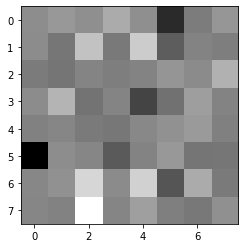

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07643213' '-0.022549953' '-0.07015698' ... '-0.12697113'
  '-0.071538195' 'Bart']
 ['-0.058427494' '0.05457296' '-0.09512029' ... '-0.09742579'
  '-0.08471599' 'Bart']
 ['-0.078164786' '-0.05223189' '-0.07356313' ... '-0.12840678'
  '-0.07180447' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


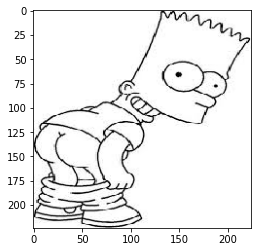

It is Bart
Bart13B
[[1. 0. 0.]]
[[-0.37926736 -0.42253134 -0.36244786  0.16842023 -0.32425883 -1.9895816
  -0.5171276  -0.2886686  -0.42700472 -0.62789166 -0.04264392 -0.6538537
   0.4566484  -1.0915378  -0.46298218 -0.5855294  -0.3327438  -0.65338135
  -0.52450436 -0.53552735 -0.53132975 -0.25028542 -0.46724457  0.25534374
  -0.36283818 -0.06002745 -0.632968   -0.48193642 -0.8303011  -0.93256974
  -0.172731   -0.58101064 -0.44756266 -0.49163046 -0.36484483 -0.39232713
  -0.41251314 -0.5233776  -0.25006732 -0.50787467 -2.1779547  -0.4451304
  -0.5258609  -1.1501489  -0.5240687  -0.25732616 -0.6011932  -0.6647918
  -0.43319273 -0.4464183   0.41217887 -0.43517023  0.16348341 -0.7518046
  -0.1900087  -0.64449996 -0.47610927 -0.533557    1.         -0.471997
  -0.09860656 -0.49459323 -0.6167431  -0.36630577]]
[[144.3272   140.8557   145.67679  188.2738   148.74109   15.11512
  133.26524  151.59686 ]
 [140.49673  124.3775   171.33795  122.29431  211.4013    87.174416
  137.60991  127.77667 

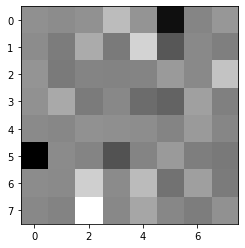

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.058427494' '0.05457296' '-0.09512029' ... '-0.09742579'
  '-0.08471599' 'Bart']
 ['-0.078164786' '-0.05223189' '-0.07356313' ... '-0.12840678'
  '-0.07180447' 'Bart']
 ['-0.07473525' '-0.083260484' '-0.07142093' ... '-0.12153022'
  '-0.07218114' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


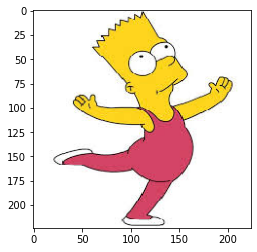

It is Bart
Bart15
[[1. 0. 0.]]
[[-0.6707356   1.         -0.5714221  -1.5487283  -0.558414   -2.181818
  -1.0176197  -0.482685   -0.73022324 -1.1581508   0.6634509  -1.1175781
   0.7274229  -0.9378154  -0.97881263 -1.1658697  -1.5887982  -1.1867845
  -0.9950407  -1.1579796  -1.168014   -0.34184533 -0.9780104   0.5433506
  -0.6679426  -1.2448123  -1.216634   -0.8990488   0.24605909 -1.2731973
  -0.38801864 -0.8878488  -0.88474125 -1.1418803  -0.24889733 -0.99797344
  -0.90723014 -0.5573551  -0.35217965 -0.87690485 -2.4718602  -1.0083766
  -0.8981389  -1.7510543  -0.9430732  -0.59428805 -1.1436791  -1.2276022
  -0.8186036  -0.3809589   0.45587838 -0.89292085  0.1962819   0.15981929
  -0.08314966 -1.2104968  -0.9920579  -0.6781429  -1.000894   -1.0247108
  -1.1928436  -0.93463874 -1.1506342  -0.7898851 ]]
[[132.28838  255.       139.58273   67.80187  140.53815   21.302933
  106.810555 146.10027 ]
 [127.91915   96.488884 230.28127   99.46884  234.97984  112.672
  109.66084   95.92194 ]
 [ 

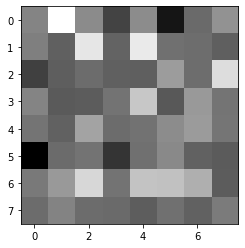

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.078164786' '-0.05223189' '-0.07356313' ... '-0.12840678'
  '-0.07180447' 'Bart']
 ['-0.07473525' '-0.083260484' '-0.07142093' ... '-0.12153022'
  '-0.07218114' 'Bart']
 ['-0.08317407' '0.12400425' '-0.07085877' ... '-0.14268354'
  '-0.09794912' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


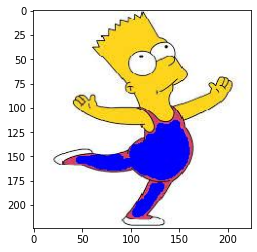

It is Homer
Bart15A
[[0. 1. 0.]]
[[-1.0382851   1.         -0.9164756  -2.2678359  -0.93939024 -4.554378
  -1.7228105  -0.6486036  -1.1951658  -2.0275993   0.21288833 -1.7735553
   0.7048178  -1.1213027  -1.5720719  -2.028687   -3.092338   -1.8876836
  -1.6351646  -1.7717587  -1.7523314  -0.6424097  -1.630593    0.8780184
  -1.1638837  -2.3754857  -1.9435916  -1.3027159  -0.5453     -2.325131
  -0.5193135  -1.36877    -1.458423   -1.7754724  -0.46634862 -1.4392587
  -1.4616698  -0.90580726 -0.4475026  -1.3472084  -5.655076   -1.6318119
  -1.4551122  -2.3597364  -1.469745   -0.94367373 -1.9106134  -1.9846928
  -1.2792025  -0.5029354   0.36503747 -1.3933752   0.38416487  0.7787791
   0.33953738 -1.7711632  -1.592092   -1.0752392  -1.1058142  -1.5922347
  -2.4635699  -1.4454185  -1.7965695  -1.355512  ]]
[[176.8998   255.       181.56714  129.78758  180.68912   42.175026
  150.67111  191.83109 ]
 [170.88867  138.99265  224.84055  148.72675  243.6896   173.71886
  156.4469   138.95096 ]
 [

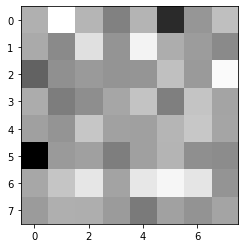

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07473525' '-0.083260484' '-0.07142093' ... '-0.12153022'
  '-0.07218114' 'Bart']
 ['-0.08317407' '0.12400425' '-0.07085877' ... '-0.14268354'
  '-0.09794912' 'Bart']
 ['-0.075232364' '0.07245829' '-0.06640626' ... '-0.13017635'
  '-0.09821808' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


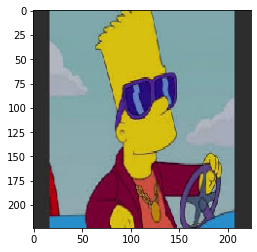

It is Bart
Bart17
[[1.000000e+00 6.262973e-09 0.000000e+00]]
[[-0.5022957  -0.0169188  -0.47175467  0.77617747 -0.4880616  -1.2471366
  -0.741345   -0.30841687 -0.6223294  -0.7009565   0.13270226 -0.822759
  -0.26786485 -0.8802115  -0.72987336 -0.74846256 -0.5679983  -0.9844192
  -0.67381144 -0.7659997  -0.8483505  -0.4764647  -0.821513   -0.09255677
  -0.52177674  0.14465788 -0.9304627  -0.6198018  -0.55622643 -0.99846995
  -0.3670515  -0.79321426 -0.670028   -0.70126384  1.         -0.4501879
  -0.77082115 -0.58246833 -0.32823014 -0.6066215  -2.1529694  -0.7781432
  -0.6792829  -1.7380975  -0.8562872  -0.3683341  -0.8845668  -0.6690221
  -0.643499   -0.58262193 -0.18691586 -0.5373223   0.197822    0.5668017
   0.49504662 -0.8282077  -0.74781704 -0.5781988   0.80737656 -0.6606548
   0.291153   -0.65632725 -0.72105956 -0.755743  ]]
[[133.50012  172.75552  135.97015  236.89809  134.6513    73.260254
  114.166725 149.1803  ]
 [123.79225  117.4332   184.8563   107.58228  152.45998  102.93

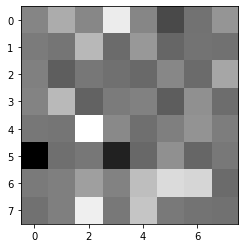

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08317407' '0.12400425' '-0.07085877' ... '-0.14268354'
  '-0.09794912' 'Bart']
 ['-0.075232364' '0.07245829' '-0.06640626' ... '-0.13017635'
  '-0.09821808' 'Homer']
 ['-0.084980965' '-0.0028624097' '-0.07981388' ... '-0.121992566'
  '-0.1278605' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


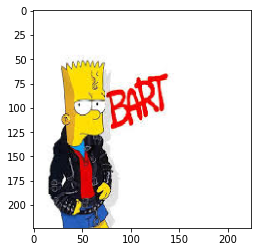

It is Lisa
Bart18
[[0. 0. 1.]]
[[-0.3852031  -0.56108534 -0.5029617   0.62353575 -0.3710275  -1.4016782
  -0.7039042  -0.29086217 -0.5916271  -0.7152314  -0.4940466  -0.83329064
   0.6407777  -1.118465   -0.25030753 -0.7266891   0.3848369  -0.89038104
  -0.78828114 -0.60156184 -0.63337255 -0.42822316 -0.6307693   1.
  -0.47318017  0.12974614 -0.7776199  -0.4360812   0.8061561  -1.4438323
  -0.10515698 -0.6990255  -0.80679137 -0.6856647   0.03768222  0.47060233
  -0.49383554 -0.24289167 -0.27547503 -0.594828   -1.1755356  -0.7361755
  -0.51421624 -2.2826805  -0.6232192  -0.2844175  -0.71583647 -0.70601094
  -0.7240214  -0.31934816 -1.2469385  -0.58266    -1.415067    0.05729143
  -0.0936329  -0.7118025  -0.6637735  -0.4083959  -1.5230694  -0.56433344
  -0.9752276  -0.73267645 -0.9097977  -0.51823276]]
[[147.39685  133.73425  138.24931  225.7561   148.498     68.43663
  122.640015 154.7253  ]
 [131.36174  121.76011  138.94183  112.58921  227.09549   90.43676
  157.8756   120.87008 ]
 [20

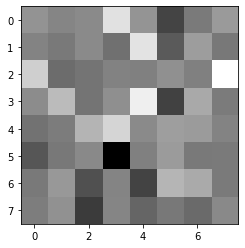

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.075232364' '0.07245829' '-0.06640626' ... '-0.13017635'
  '-0.09821808' 'Homer']
 ['-0.084980965' '-0.0028624097' '-0.07981388' ... '-0.121992566'
  '-0.1278605' 'Bart']
 ['-0.06261759' '-0.09120853' '-0.081760116' ... '-0.1478943'
  '-0.08424254' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


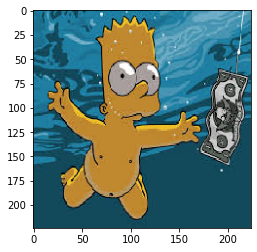

It is Bart
Bart19
[[1. 0. 0.]]
[[-0.31134456  0.43082592 -0.37458035  0.45234212 -0.4289476  -0.3819135
  -0.49270865 -0.2359168  -0.44641647 -0.57280797  1.         -0.57835495
  -0.5915555  -1.4305497  -0.552032   -0.57959783 -0.416263   -0.73595124
  -0.5361907  -0.55149853 -0.7102623  -0.31491634 -0.58034456  0.16837864
  -0.38503465  0.634108   -0.7432897  -0.5197674  -0.74335086 -0.9301462
  -0.17968076 -0.5285214  -0.4512564  -0.6100927  -0.2303978   0.35721374
  -0.5001326  -0.32869828 -0.22680087 -0.46907243 -1.86081    -0.611274
  -0.51201004 -1.4946793  -0.5827431  -0.24876255 -0.57883793 -0.64254874
  -0.4991474  -0.30834615  0.2841503  -0.48750547  0.29382876 -1.1654975
  -0.17660144 -0.5767699  -0.5482302  -0.41331396  0.1006262  -0.51126903
  -0.44519627 -0.47399476 -0.6118056  -0.4446133 ]]
[[138.11252  204.26633  132.47595  206.18419  127.629906 131.82231
  121.946526 144.83583 ]
 [126.072815 114.806816 255.       114.31239  113.13575   38.3515
  116.65871  114.2016  ]

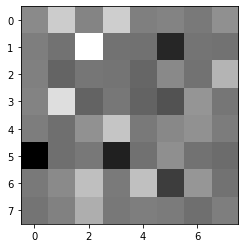

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.084980965' '-0.0028624097' '-0.07981388' ... '-0.121992566'
  '-0.1278605' 'Bart']
 ['-0.06261759' '-0.09120853' '-0.081760116' ... '-0.1478943'
  '-0.08424254' 'Lisa']
 ['-0.06276109' '0.08684625' '-0.07550822' ... '-0.12332828'
  '-0.089625515' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


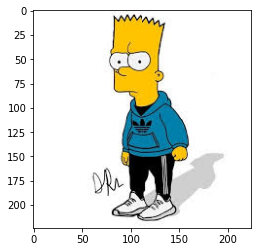

It is Bart
Bart20
[[1. 0. 0.]]
[[-1.1769086   0.0727403  -0.9555765   0.9915733  -0.9927204  -4.6380816
  -1.6440443  -0.89455587 -1.3005766  -1.6233041   1.         -1.6575361
   0.3823745  -3.4303977  -1.6271433  -1.6746476  -2.8267968  -1.7892799
  -1.1730629  -1.4934088  -1.9193306  -0.77376527 -1.6379913  -0.34531295
  -1.0681992  -1.4389801  -1.7720963  -1.2420554  -1.6430318  -3.548428
  -0.23210235 -1.933154   -1.2169981  -1.4454094  -1.3896335   0.59896225
  -1.5677277  -1.1322283  -0.5856105  -1.1519446  -5.591598   -1.4557667
  -1.5824409  -3.1490493  -1.6889931  -0.71668607 -1.7183528  -1.647149
  -1.5306563  -1.0638024   0.7954495  -1.1929083   0.8883037   0.5913974
   0.34887338 -1.8228755  -1.5553374  -1.3224244  -1.2967098  -1.2419317
   0.6071947  -1.2729785  -1.9074422  -1.7197369 ]]
[[170.78496 219.1284  179.34732 254.67403 177.91039  36.88738 152.71355
  181.70795]
 [166.0008  153.51588 255.      152.1916  231.10678  83.60736 153.36737
  151.52962]
 [106.95804 147.0

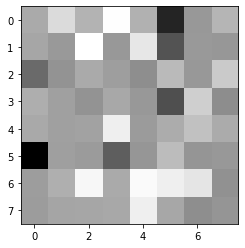

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06261759' '-0.09120853' '-0.081760116' ... '-0.1478943'
  '-0.08424254' 'Lisa']
 ['-0.06276109' '0.08684625' '-0.07550822' ... '-0.12332828'
  '-0.089625515' 'Bart']
 ['-0.08411097' '0.005198583' '-0.06829286' ... '-0.13632053'
  '-0.122905664' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


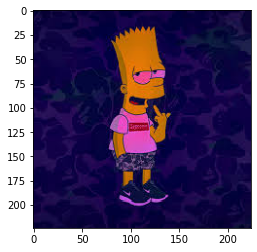

It is Bart
Bart21
[[1. 0. 0.]]
[[-0.27366692  0.6047163  -0.36026925  1.         -0.4007945  -1.1671745
  -0.34124467 -0.20277809 -0.40587696 -0.4354069   0.6099616  -0.43655264
  -0.8853228  -0.6503349  -0.38735795 -0.43668023 -0.8045893  -0.4796512
  -0.38564575 -0.40159932 -0.44943342 -0.20995538 -0.40642995  0.00715342
  -0.31938568  0.6124665  -0.56550974 -0.36917752 -0.8376809  -0.845056
  -0.10846797 -0.46507147 -0.4607323  -0.3697602   0.33853963  0.6102409
  -0.40078738 -0.3726466  -0.12671328 -0.29251838 -2.2603302  -0.43182203
  -0.4185024  -1.2426972  -0.45590878 -0.15365979 -0.36218953 -0.34442228
  -0.43735224 -0.2964468   0.1366211  -0.26613092  0.39616415  0.10029224
   0.2179589  -0.4812345  -0.41494372 -0.38989663  0.8550433  -0.32965264
   0.66214937 -0.36568263 -0.4557769  -0.34153855]]
[[155.38277  224.08371  148.60936  255.       145.43974   85.49892
  150.0973   160.92719 ]
 [145.04224  142.7326   224.49394  142.64299  107.543365 125.922455
  146.49065  142.63301

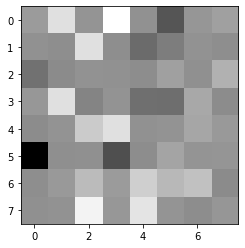

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06276109' '0.08684625' '-0.07550822' ... '-0.12332828'
  '-0.089625515' 'Bart']
 ['-0.08411097' '0.005198583' '-0.06829286' ... '-0.13632053'
  '-0.122905664' 'Bart']
 ['-0.059020825' '0.13041714' '-0.07769806' ... '-0.098295875'
  '-0.073658474' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


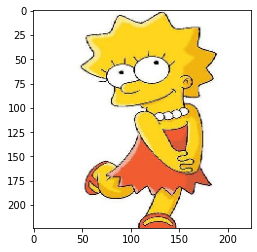

It is Lisa
Lisa1
[[0. 0. 1.]]
[[-0.75572854 -0.21958788 -0.6098443  -0.35412258 -0.6453982  -1.0700499
  -0.8252374  -0.41265804 -0.84624624 -0.9843239  -0.4415468  -1.0503513
   0.7778913  -1.5168551  -0.88941956 -1.1401716  -0.7839925  -1.138459
  -0.96613836 -0.7756594  -0.9747967  -0.60251904 -0.87254196  0.42913464
  -0.61404216 -0.87606496 -1.2011361  -0.899496   -0.8912832  -1.7050937
  -0.42178518 -0.9901212  -0.8717455  -0.93735045 -0.50231516  0.04749665
  -0.957545   -0.5512283  -0.45673975 -0.7900473  -3.5761578  -0.94029045
  -0.8900039  -2.3827007  -0.96960527 -0.35061502 -0.96728    -1.0397136
  -0.8260835  -0.5574465   1.         -0.80552876 -0.87341505 -0.6312437
   0.01186889 -1.0624534  -0.7866097  -0.6961899  -0.51373285 -0.8198408
   0.40541074 -0.8516278  -1.0448343  -0.79531705]]
[[157.16447 187.04016 165.29367 179.54343 163.31248 139.64937 153.29121
  176.2816 ]
 [152.1205  144.42632 174.67181 140.74704 242.6233  114.75177 149.71474
  135.74193]
 [155.58951 135.

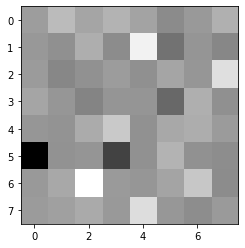

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08411097' '0.005198583' '-0.06829286' ... '-0.13632053'
  '-0.122905664' 'Bart']
 ['-0.059020825' '0.13041714' '-0.07769806' ... '-0.098295875'
  '-0.073658474' 'Bart']
 ['-0.09580389' '-0.027837208' '-0.07731011' ... '-0.13245389'
  '-0.10082254' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


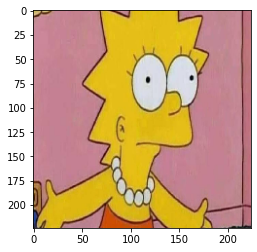

It is Lisa
Lisa2
[[0. 0. 1.]]
[[-5.5345637e-01 -3.9834124e-01 -5.4018831e-01  8.7713534e-01
  -4.5439151e-01 -1.2613276e+00 -7.4697751e-01 -4.4054297e-01
  -6.7309040e-01 -7.6293880e-01 -1.4330468e-01 -9.8038536e-01
   4.9363646e-01 -1.1717753e+00 -8.3873826e-01 -9.0582341e-01
   2.4878971e-01 -9.1454828e-01 -7.2809511e-01 -7.3761994e-01
  -9.5102441e-01 -3.6016148e-01 -6.9745731e-01 -3.1199214e-01
  -5.4827839e-01 -3.2828993e-01 -9.8933876e-01 -7.0105904e-01
  -1.3878076e-01 -1.4032854e+00 -3.2501101e-01 -8.4451574e-01
  -6.0799271e-01 -7.2588032e-01 -9.4247890e-01 -2.5353262e-03
  -7.3319465e-01 -5.3043050e-01 -2.9875839e-01 -5.9266877e-01
  -3.6278243e+00 -7.0902824e-01 -8.1411082e-01 -2.0081959e+00
  -8.0290037e-01 -4.3556404e-01 -8.5769200e-01 -9.9291456e-01
  -7.2956640e-01 -6.4284611e-01  1.0000000e+00 -6.1966693e-01
  -1.3319979e-02 -1.3975254e+00 -5.2519351e-01 -8.5557479e-01
  -8.6140251e-01 -7.6511192e-01 -4.9925736e-01 -6.8174988e-01
   6.8506026e-01 -5.3278804e-01 -7.83340

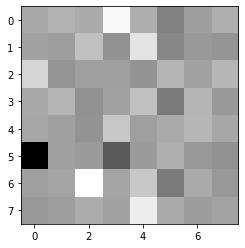

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.059020825' '0.13041714' '-0.07769806' ... '-0.098295875'
  '-0.073658474' 'Bart']
 ['-0.09580389' '-0.027837208' '-0.07731011' ... '-0.13245389'
  '-0.10082254' 'Lisa']
 ['-0.07780724' '-0.0560005' '-0.07594196' ... '-0.110125385'
  '-0.09209834' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


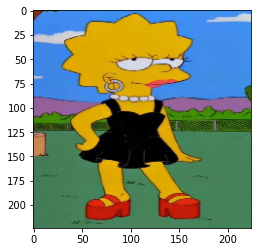

It is Lisa
Lisa3
[[0. 0. 1.]]
[[-0.27764994 -0.1801749  -0.25416544  1.         -0.30313176 -0.77403736
  -0.43318626 -0.23898712 -0.23234168 -0.44177565 -0.00686919 -0.49262878
   0.37684044 -0.8774811  -0.30133262 -0.40821156  0.28184047 -0.5139993
  -0.3894214  -0.3824759  -0.4417011  -0.18373807 -0.37977508 -0.06005901
  -0.35268208 -0.2115308  -0.4839434  -0.3541454  -0.1609641  -0.41574222
  -0.11435156 -0.36510867 -0.32123306 -0.33646947 -0.45986295 -0.36742777
  -0.35550603 -0.15482892 -0.22004835 -0.35332975 -1.277554   -0.43413505
  -0.31339735 -0.8086821  -0.36320552 -0.14535688 -0.45486557 -0.44195917
  -0.3231115  -0.14897104  0.55574715 -0.27644956 -0.04558607  0.05262826
  -0.2650427  -0.44059268 -0.41401315 -0.27174783 -0.44797733 -0.39306954
  -0.04222576 -0.4312091  -0.47146484 -0.3163881 ]]
[[111.95148  122.86499  114.58086  255.       109.09848   56.374844
   94.537285 116.28025 ]
 [117.02429   93.57559  142.26868   87.88197  185.22966   44.793053
  109.29991   97.3

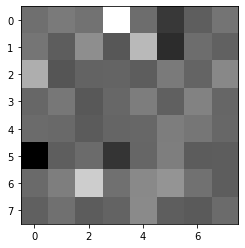

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.09580389' '-0.027837208' '-0.07731011' ... '-0.13245389'
  '-0.10082254' 'Lisa']
 ['-0.07780724' '-0.0560005' '-0.07594196' ... '-0.110125385'
  '-0.09209834' 'Lisa']
 ['-0.08162786' '-0.05297063' '-0.07472353' ... '-0.1386086'
  '-0.093016714' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


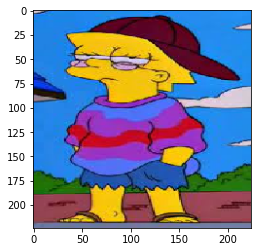

It is Bart
Lisa4
[[1. 0. 0.]]
[[-0.6690414  -0.21766648 -0.6686964   0.08591643 -0.8313701  -1.7615023
  -1.0562305  -0.65470046 -0.878822   -1.0665282  -0.47625816 -1.3216074
  -0.9650899  -1.7120475  -0.9194338  -1.1416471  -0.40166938 -1.210936
  -1.1105533  -0.7059537  -1.1446375  -0.59053946 -0.96918863  0.2321414
  -0.82304317 -0.55965686 -1.2233608  -0.96607906 -1.5318173  -2.105795
  -0.31112534 -1.1055375  -0.7588185  -1.0987779  -0.11514769  0.44093376
  -0.9811994  -0.7323106  -0.45410264 -1.0002083  -3.4475398  -1.0082505
  -0.6326821  -2.4514053  -1.0007839  -0.27076894 -1.1688281  -1.0461266
  -0.79011166 -0.6498201   0.41634035 -1.0169451   0.14163396 -1.2040596
   1.         -1.1262461  -1.1093811  -0.9534674  -0.05882655 -1.0254642
  -0.72897536 -0.9352889  -1.1257299  -0.6833553 ]]
[[159.3054  185.18503 159.32518 202.59094 149.99826  96.66907 137.10588
  160.12764]
 [147.2776  136.51546 170.35863 121.89049 142.33142  99.50457 144.94914
  132.20851]
 [174.6352  128.235

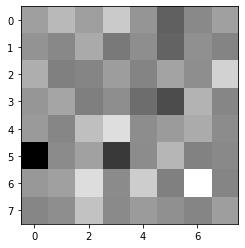

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07780724' '-0.0560005' '-0.07594196' ... '-0.110125385'
  '-0.09209834' 'Lisa']
 ['-0.08162786' '-0.05297063' '-0.07472353' ... '-0.1386086'
  '-0.093016714' 'Lisa']
 ['-0.077993214' '-0.025374373' '-0.07795299' ... '-0.13123147'
  '-0.079661846' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


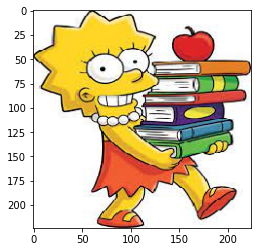

It is Lisa
Lisa5
[[0. 0. 1.]]
[[-0.54077834  0.07767847 -0.52282983 -0.8698887  -0.6483314  -1.907851
  -0.8011766  -0.44041908 -0.5971561  -0.9832859  -0.2551376  -0.88512456
   0.20818876 -1.6183128  -0.82979566 -0.98476857  0.14857572 -0.9722093
  -0.7442649  -0.8157955  -0.9287571  -0.49987024 -0.8661976   0.09704574
  -0.5618114  -0.7051456  -1.0806173  -0.73015606 -0.58345145 -1.2706108
  -0.23903745 -0.8530258  -0.7698105  -0.8547052  -0.75588816 -0.26823005
  -0.6278635  -0.41452566 -0.2589662  -0.6520705  -3.0199974  -0.8381809
  -0.70301473 -1.8303906  -0.9014067  -0.37870637 -0.9045606  -0.85978264
  -0.83733624 -0.44572398  1.         -0.79277325 -0.3589184  -0.3554249
  -0.14533895 -0.82845134 -0.78345627 -0.69751596 -0.3802296  -0.81330967
  -0.57786703 -0.68112266 -0.8944228  -0.7312999 ]]
[[157.264    196.49448  158.40251  136.38757  150.44159   70.54664
  140.74619  163.63005 ]
 [153.68779  129.19447  175.383    135.42111  204.77313   88.91287
  138.93079  129.1004  ]


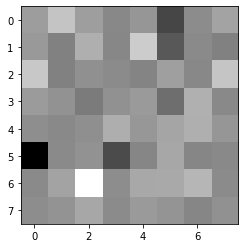

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08162786' '-0.05297063' '-0.07472353' ... '-0.1386086'
  '-0.093016714' 'Lisa']
 ['-0.077993214' '-0.025374373' '-0.07795299' ... '-0.13123147'
  '-0.079661846' 'Bart']
 ['-0.07743992' '0.011123624' '-0.07486968' ... '-0.12808213'
  '-0.104722776' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


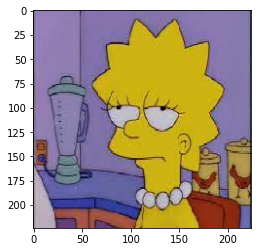

It is Lisa
Lisa6
[[0. 0. 1.]]
[[-0.352917   -0.1061343  -0.37020054  0.32177934 -0.25877544 -1.0748504
  -0.4380081  -0.27541277 -0.41217145 -0.521523   -0.3579921  -0.5104275
   0.3999917  -1.1951004  -0.41573036 -0.5668108  -0.37294784 -0.58009946
  -0.5214584  -0.4720322  -0.6444383  -0.23149589 -0.5090404   0.09151597
  -0.33320826  0.09596614 -0.58025277 -0.44775862  0.29912585 -0.86282414
  -0.16349371 -0.52577055 -0.3603142  -0.44636726 -0.29880473 -0.21122378
  -0.52782816 -0.24514477 -0.19448642 -0.35933644 -1.8345096  -0.4983369
  -0.48103315 -1.0440234  -0.48875377 -0.28348586 -0.4882494  -0.5818374
  -0.4550467  -0.35996518  1.         -0.41448614 -0.12929656 -0.7227952
  -0.3566904  -0.5511175  -0.50429046 -0.45142418  0.00239759 -0.43183553
   0.6501103  -0.44653264 -0.51207244 -0.39041147]]
[[133.288    155.48923  131.73312  193.98546  141.75722   68.34094
  125.63297  140.26048 ]
 [127.9573   118.11975  132.83142  119.117935 201.02165   57.52295
  127.637146 114.04555 ]

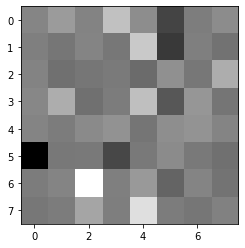

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.077993214' '-0.025374373' '-0.07795299' ... '-0.13123147'
  '-0.079661846' 'Bart']
 ['-0.07743992' '0.011123624' '-0.07486968' ... '-0.12808213'
  '-0.104722776' 'Lisa']
 ['-0.080457546' '-0.024196357' '-0.08439782' ... '-0.1167416'
  '-0.089005485' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


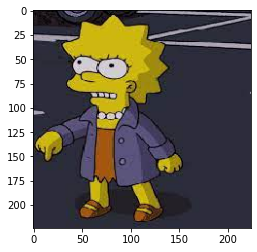

It is Lisa
Lisa7
[[0. 0. 1.]]
[[-0.2384285  -0.07312884 -0.23814747  1.         -0.35672513 -0.43272266
  -0.45567867 -0.2998773  -0.35458478 -0.43427396 -0.15344574 -0.5413777
  -0.06350655 -0.93456835 -0.4229098  -0.45820633  0.6753297  -0.5521087
  -0.44803047 -0.40142485 -0.46560735 -0.21535926 -0.4118071  -0.2047039
  -0.33843654 -0.14809375 -0.52313536 -0.40385643 -0.29946142 -0.6373603
  -0.09886537 -0.4347598  -0.37625283 -0.4162588  -0.6150666  -0.23154172
  -0.36895877 -0.21887636 -0.17072687 -0.35184187 -1.64169    -0.45183834
  -0.3141765  -0.85658795 -0.39667505 -0.17103334 -0.49449682 -0.47326323
  -0.39763063 -0.22478206  0.13252431 -0.35237914 -0.01038258  0.42994186
  -0.16935225 -0.45976582 -0.4199615  -0.33228    -0.02560988 -0.3764227
  -0.24456356 -0.4285349  -0.47981605 -0.45193678]]
[[135.45558  151.41182  135.48271  255.       124.036514 116.70054
  114.48462  129.524   ]
 [124.243126 116.550804 143.65889  106.212166 152.34065   68.25783
  117.64777  114.24062 ]

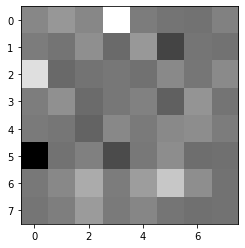

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07743992' '0.011123624' '-0.07486968' ... '-0.12808213'
  '-0.104722776' 'Lisa']
 ['-0.080457546' '-0.024196357' '-0.08439782' ... '-0.1167416'
  '-0.089005485' 'Lisa']
 ['-0.0640747' '-0.01965247' '-0.063999176' ... '-0.1289446' '-0.1214524'
  'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


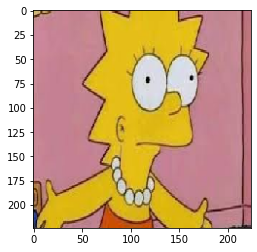

It is Lisa
Lisa8
[[0. 0. 1.]]
[[-0.59040344 -0.3442052  -0.5759311   0.8447872  -0.49178907 -1.4452587
  -0.78950715 -0.45694423 -0.7406999  -0.81980723 -0.12288626 -1.0411106
   0.53188306 -1.2454034  -0.8929912  -0.96997494  0.18501921 -0.97672
  -0.79058856 -0.78677815 -1.0342016  -0.38349786 -0.7571754  -0.2701982
  -0.57533723 -0.35881814 -1.0637351  -0.76551116 -0.23347291 -1.5182782
  -0.330238   -0.9487899  -0.6400911  -0.814181   -0.9969718   0.02669216
  -0.7711175  -0.55961    -0.31455696 -0.64985245 -3.8221564  -0.77101237
  -0.86759984 -2.1459033  -0.8683731  -0.45009288 -0.921414   -1.0512013
  -0.7792467  -0.67768234  1.         -0.6820472  -0.10025522 -1.4874145
  -0.52794164 -0.91662604 -0.93733186 -0.83447784 -0.57234305 -0.75502855
   0.6574495  -0.5843287  -0.85393023 -0.703209  ]]
[[170.89803 183.9172  171.66333 246.7922  176.11282 125.6925  160.36923
  177.95547]
 [162.95021 158.76694 195.62074 147.06422 230.24554 136.26103 154.89691
  150.82594]
 [211.90308 150.4

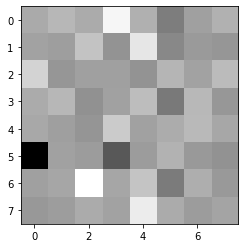

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.080457546' '-0.024196357' '-0.08439782' ... '-0.1167416'
  '-0.089005485' 'Lisa']
 ['-0.0640747' '-0.01965247' '-0.063999176' ... '-0.1289446' '-0.1214524'
  'Lisa']
 ['-0.07784686' '-0.04538472' '-0.07593862' ... '-0.11259384'
  '-0.09272069' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


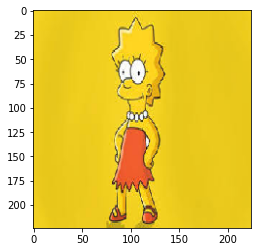

It is Homer
Lisa9
[[0.0000000e+00 1.0000000e+00 3.3144325e-18]]
[[-0.31299672 -0.41204664 -0.39672363  0.5746221  -0.26247945 -1.6644698
  -0.4042141  -0.14446273 -0.39729443 -0.5266127  -0.13353257 -0.4881407
   0.23882599 -0.5698851  -0.54025555 -0.582959   -0.41532293 -0.5130166
  -0.5196785  -0.4307635  -0.570162   -0.19762655 -0.5274187   0.551327
  -0.4184334  -0.50332123 -0.5806593  -0.46036273 -0.6374837  -1.1570923
  -0.1840753  -0.49624133 -0.47153094 -0.49676484  0.01425037 -0.41806325
  -0.4342452  -0.3925201  -0.22009659 -0.39495265 -2.0150406  -0.53416526
  -0.4041557  -1.4180244  -0.5202174  -0.2361474  -0.4592994  -0.46527785
  -0.41078582 -0.40979406 -0.01919979 -0.35448578 -0.4532343   1.
  -0.16241878 -0.5661784  -0.5171032  -0.42230633  0.06304539 -0.4119581
   0.8103189  -0.35248873 -0.52860135 -0.34475783]]
[[143.95203  135.57478  136.87076  219.02325  148.22458   29.649876
  136.23721  158.20595 ]
 [136.82245  125.88525  159.13039  129.13907  190.62296  122.22544

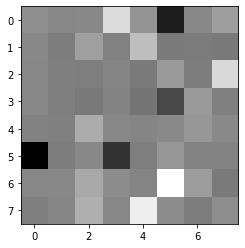

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.0640747' '-0.01965247' '-0.063999176' ... '-0.1289446' '-0.1214524'
  'Lisa']
 ['-0.07784686' '-0.04538472' '-0.07593862' ... '-0.11259384'
  '-0.09272069' 'Lisa']
 ['-0.06583541' '-0.08666947' '-0.08344644' ... '-0.11118547'
  '-0.07251601' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


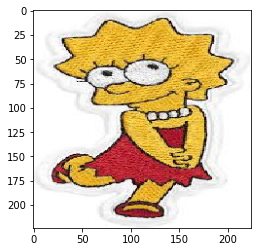

It is Lisa
Lisa10
[[0. 0. 1.]]
[[-1.1394674   0.211688   -0.95021844 -0.7428057  -1.074367   -2.9408102
  -1.3213099  -0.637243   -1.2478586  -1.4729241  -1.1568539  -1.5026625
   0.52088124 -2.8586402  -1.5035639  -1.566845   -1.7094132  -1.6104213
  -1.4859352  -1.149505   -1.39846    -0.8897486  -1.3878291   0.9629119
  -0.8109018  -1.1446022  -1.6893747  -1.3376727  -0.5150522  -2.4064631
  -0.39858112 -1.342905   -1.2177882  -1.4611763  -0.07610404  0.07401206
  -1.2101115  -0.7894547  -0.64650136 -1.1556144  -5.399439   -1.4494058
  -1.3834611  -3.2635305  -1.4601979  -0.6363657  -1.4296284  -1.3833017
  -1.3584001  -0.7931639   1.         -1.2625     -0.8219091  -0.5917102
  -0.00605314 -1.5438046  -1.3735726  -1.2421765   0.19997433 -1.3465986
  -0.4563205  -1.2785869  -1.5954639  -1.0830415 ]]
[[169.74811  223.58795  177.28917  185.55399  172.34218   97.969574
  162.5022   189.76038 ]
 [165.42903  156.4608   169.05531  155.2758   235.90845  101.24382
  155.23987  152.7183  ]
 

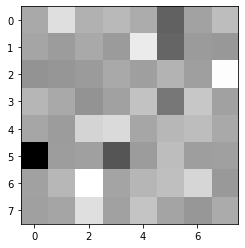

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07784686' '-0.04538472' '-0.07593862' ... '-0.11259384'
  '-0.09272069' 'Lisa']
 ['-0.06583541' '-0.08666947' '-0.08344644' ... '-0.11118547'
  '-0.07251601' 'Homer']
 ['-0.09575175' '0.01778857' '-0.079848774' ... '-0.13407005'
  '-0.09101017' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


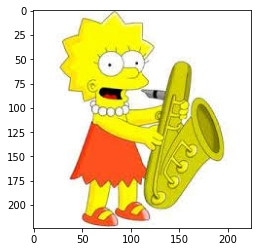

It is Lisa
Lisa11
[[0. 0. 1.]]
[[-0.90112233  0.20967032 -0.66598254 -0.22284468 -0.6336399  -3.7249148
  -1.0928148  -0.52274966 -0.89643943 -1.2808877  -0.2634656  -1.3201838
   0.85115844 -1.9227148  -1.0115634  -1.1972151   0.8324598  -1.3042448
  -1.11464    -1.0400013  -1.1939136  -0.4898317  -0.98754257  0.14743707
  -0.84373665 -0.47096518 -1.2818246  -0.93584245 -0.5208141  -1.9797416
  -0.4462108  -1.26414    -0.8398832  -1.1212332  -0.33036256 -0.33605644
  -1.089958   -0.71728146 -0.5351499  -0.9136465  -4.4412575  -1.1933734
  -1.0499349  -3.2940075  -1.1716977  -0.43072397 -1.3571329  -1.1497545
  -0.9446009  -0.9434966   1.         -0.91128737 -0.2676244   0.11810687
  -0.31395164 -1.2206041  -1.0795829  -1.0021096  -0.8643872  -1.0446053
  -0.76209563 -0.7763515  -1.2014632  -0.9021946 ]]
[[165.90549  217.96187  176.92513  197.6924   178.44083   33.5708
  156.92198  183.6376  ]
 [166.12494  148.1081   195.78874  146.26653  248.02469  118.0294
  160.72977  152.02936 ]
 [

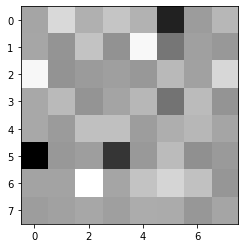

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.06583541' '-0.08666947' '-0.08344644' ... '-0.11118547'
  '-0.07251601' 'Homer']
 ['-0.09575175' '0.01778857' '-0.079848774' ... '-0.13407005'
  '-0.09101017' 'Lisa']
 ['-0.08983571' '0.020902691' '-0.06639389' ... '-0.119777635'
  '-0.08994261' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


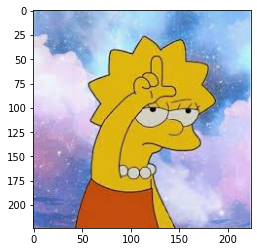

It is Lisa
Lisa12
[[0. 0. 1.]]
[[-0.49462816 -0.7773645  -0.5622658   0.2780613  -0.38143504 -1.7189252
  -0.6267705  -0.250596   -0.48903054 -0.66930765 -0.45985287 -0.75605917
   0.75335777 -1.6187406  -0.68570554 -0.81637913  0.04810151 -0.8354065
  -0.7206359  -0.6662242  -0.8757585  -0.24682415 -0.73213756  0.68629885
  -0.44537306 -0.63533014 -0.8571307  -0.6140657  -0.07537679 -1.395223
  -0.26955435 -0.7663048  -0.47856537 -0.72078735  0.43844754 -0.30871874
  -0.7518569  -0.3468084  -0.17802882 -0.5195843  -3.4202256  -0.6198958
  -0.6759644  -1.731495   -0.6804414  -0.35749322 -0.6479741  -0.6717236
  -0.77705723 -0.57400864  0.76840216 -0.47689766 -0.44270217 -0.9726076
  -0.11541057 -0.7078907  -0.70105916 -0.47031033 -0.69835997 -0.48630166
   1.         -0.5038515  -0.80626285 -0.48927456]]
[[168.77585 152.46498 164.87389 213.35182 175.3059   98.14694 161.15265
  182.85391]
 [169.09877 158.6987  170.78203 153.69406 240.77138 103.92653 157.75272
  150.21423]
 [200.08559 14

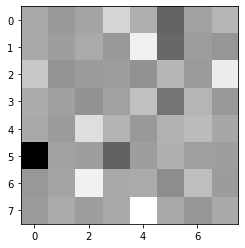

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.09575175' '0.01778857' '-0.079848774' ... '-0.13407005'
  '-0.09101017' 'Lisa']
 ['-0.08983571' '0.020902691' '-0.06639389' ... '-0.119777635'
  '-0.08994261' 'Lisa']
 ['-0.07420842' '-0.116626985' '-0.08435601' ... '-0.120962575'
  '-0.07340523' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


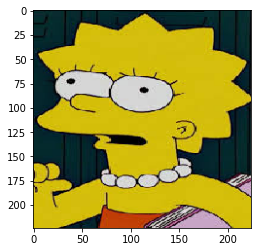

It is Lisa
Lisa13
[[0. 0. 1.]]
[[-0.30429766 -0.36444923 -0.34065166  0.4663468  -0.38806865 -0.7756035
  -0.43450683 -0.27129793 -0.34031147 -0.5085526  -0.34742916 -0.5854355
   1.         -0.6078599  -0.40224886 -0.5455066   0.23705567 -0.6282459
  -0.4823485  -0.53332096 -0.43123657 -0.24507046 -0.5162204   0.32890323
  -0.26440728 -0.3613508  -0.6352817  -0.38049737 -0.28287208 -0.7547546
  -0.1676455  -0.55125576 -0.43506348 -0.4381472  -0.41842967 -0.37068123
  -0.38894305 -0.30142656 -0.16554144 -0.3596     -0.5612469  -0.4983516
  -0.34461966 -0.91822505 -0.4064933  -0.2283764  -0.5672221  -0.49880987
  -0.42195898 -0.3231015   0.78891563 -0.41907915 -0.1944441  -0.40159646
  -0.64147663 -0.5367393  -0.4824283  -0.40134513 -0.53746724 -0.40614754
  -0.15137017 -0.3750523  -0.48336983 -0.42678776]]
[[ 81.61268   73.61641   76.779945 184.05861   70.47655   18.959461
   64.303276  85.99951 ]
 [ 76.82517   54.459972  75.878975  44.239513 255.        41.25852
   68.5915    49.54747

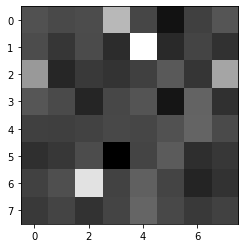

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08983571' '0.020902691' '-0.06639389' ... '-0.119777635'
  '-0.08994261' 'Lisa']
 ['-0.07420842' '-0.116626985' '-0.08435601' ... '-0.120962575'
  '-0.07340523' 'Lisa']
 ['-0.080269344' '-0.09613647' '-0.089859016' ... '-0.12750602'
  '-0.11258048' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


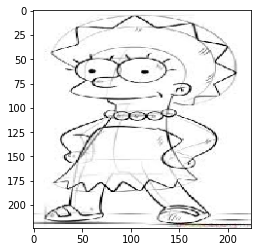

It is Bart
Lisa14
[[1. 0. 0.]]
[[-1.2067829   1.         -1.5269008  -2.386239   -1.3946495  -3.6379697
  -1.6624792  -0.74441475 -1.627067   -2.1707933   0.0670454  -2.1370938
   0.66273713 -3.0113146  -1.8846971  -2.0221453  -0.10800403 -2.1351595
  -1.9418552  -1.6505644  -2.1693048  -1.2161694  -2.1886518   0.6775335
  -1.5058538  -0.8072267  -2.267487   -1.7026509  -0.63357526 -3.7525952
  -0.75409156 -1.9372337  -1.7794448  -1.8934288  -0.07899335  0.7044316
  -1.9464347  -1.0046258  -0.932948   -1.5774363  -8.140336   -1.920472
  -1.7071118  -5.6483088  -2.0239089  -0.8503529  -2.0752587  -2.0953486
  -1.8298665  -1.3285079   0.9315553  -1.6352367  -0.60313123 -0.60826015
   0.5122815  -2.1466916  -1.9420104  -1.6449451  -0.1029014  -1.8417711
  -0.5037378  -1.4961085  -2.230863   -1.5773093 ]]
[[193.43446 255.      184.50371 160.52962 188.1933  125.60843 180.7213
  206.33374]
 [181.70924 166.5402  228.97212 167.48036 245.59091 143.09106 174.52179
  170.68723]
 [224.08855 167.53

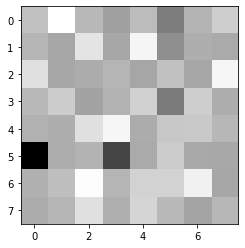

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07420842' '-0.116626985' '-0.08435601' ... '-0.120962575'
  '-0.07340523' 'Lisa']
 ['-0.080269344' '-0.09613647' '-0.089859016' ... '-0.12750602'
  '-0.11258048' 'Lisa']
 ['-0.07236264' '0.05996326' '-0.09155795' ... '-0.13376983'
  '-0.094580606' 'Bart']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


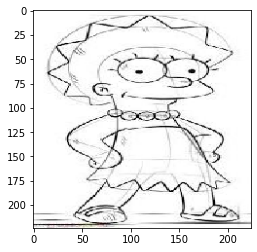

It is Lisa
Lisa14A
[[0. 0. 1.]]
[[-1.3131096  -0.07641654 -1.2597903  -1.8628416  -1.3047982  -3.7177248
  -1.7429718  -0.8614173  -1.4403527  -1.994628   -0.8501468  -2.1238582
   0.4750968  -3.5696537  -1.7976933  -2.0101871  -0.97737026 -2.131935
  -1.6725152  -1.6297106  -2.0628374  -1.0819125  -1.8781528   0.55901647
  -1.1742028  -1.7657734  -2.2156556  -1.4385811  -1.3948956  -3.57143
  -0.3493466  -2.057044   -1.9371514  -2.0025191   0.03499308  0.12395112
  -1.7385368  -0.9558022  -0.6589016  -1.5367048  -9.068689   -2.0241113
  -1.626031   -4.632579   -1.9789522  -0.5706042  -1.8468534  -2.0407028
  -1.5622205  -1.1571875   1.         -1.6543611  -1.0467688   0.31982136
   0.3551573  -2.1223145  -1.8068984  -1.6181499   0.11119772 -1.6083374
  -0.8698977  -1.6149117  -2.061588   -1.3978254 ]]
[[196.41809  227.73865  197.76846  182.49556  196.6286   135.51872
  185.5314   207.85768 ]
 [193.19554  179.15794  208.14311  175.88504  241.70628  139.26878
  184.14551  178.76389 ]
 [

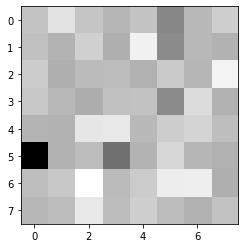

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.080269344' '-0.09613647' '-0.089859016' ... '-0.12750602'
  '-0.11258048' 'Lisa']
 ['-0.07236264' '0.05996326' '-0.09155795' ... '-0.13376983'
  '-0.094580606' 'Bart']
 ['-0.07896344' '-0.004595285' '-0.0757571' ... '-0.12397297'
  '-0.08405779' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


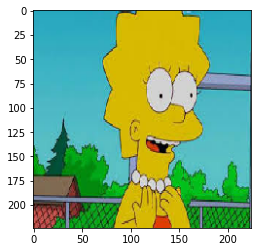

It is Lisa
Lisa16
[[0. 0. 1.]]
[[-0.48294204 -0.07952601 -0.44366106  1.         -0.4141151  -1.8135791
  -0.5111099  -0.2604797  -0.4340194  -0.6024579  -0.14062656 -0.78304744
   0.28601134 -1.346606   -0.49830028 -0.7141931  -0.40925792 -0.7581472
  -0.577682   -0.5477481  -0.7105984  -0.3401698  -0.6216025  -0.06296966
  -0.4715705   0.416792   -0.7649698  -0.58379406 -0.43910223 -1.1407297
  -0.19299372 -0.7297748  -0.4200936  -0.48209152  0.57185036 -0.0189408
  -0.6498887  -0.39732575 -0.20179494 -0.51747054 -0.9872253  -0.5347349
  -0.47809604 -1.4984362  -0.6035883  -0.27120772 -0.72571653 -0.7056304
  -0.53329086 -0.5008832   0.45506495 -0.4831635   0.14986742 -0.79304373
   0.2130139  -0.7022116  -0.5972346  -0.5504513  -0.7078395  -0.49314323
   0.6921945  -0.49102947 -0.663416   -0.4832135 ]]
[[120.598145 157.1605   124.15827  255.       126.83607    0.
  118.04524  140.76033 ]
 [125.03211  109.7662   151.62283   93.399025 190.28986   42.32266
  119.20621   99.639435]
 [12

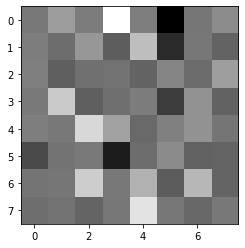

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07236264' '0.05996326' '-0.09155795' ... '-0.13376983'
  '-0.094580606' 'Bart']
 ['-0.07896344' '-0.004595285' '-0.0757571' ... '-0.12397297'
  '-0.08405779' 'Lisa']
 ['-0.09359945' '-0.0154130105' '-0.08598636' ... '-0.12857728'
  '-0.09365206' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


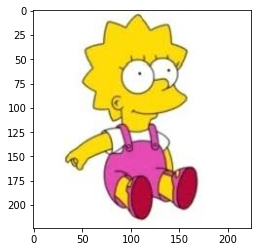

It is Lisa
Lisa17
[[0. 0. 1.]]
[[-0.5833224  -0.51237565 -0.6051956   0.56898123 -0.45784935 -1.7591281
  -0.8888291  -0.45578244 -0.68417436 -1.0043732  -0.3157366  -0.9012291
   0.74341    -1.6188279  -0.7517728  -0.9067275  -0.1690069  -1.0213754
  -0.8650911  -0.7848951  -0.98076385 -0.45395935 -0.7598459  -0.52622694
  -0.6848421  -0.8313108  -1.0080272  -0.7321031   0.1410021  -1.6299078
  -0.41327983 -0.87930995 -0.577741   -0.7893833  -1.113265   -0.24788152
  -0.73816293 -0.63746095 -0.5265764  -0.6989633  -3.4093766  -0.8350849
  -0.75720483 -2.1680496  -0.79956555 -0.4340516  -1.0452887  -0.8630554
  -0.8491659  -0.5338712   1.         -0.6354237   0.05124354 -1.1328387
  -0.72775036 -0.982647   -0.8401276  -0.7043871  -0.15632488 -0.74425036
   0.03810018 -0.6948548  -0.8786405  -0.73302615]]
[[163.4344  167.53734 162.16945 230.07362 170.69067  95.43602 145.76654
  170.8102 ]
 [157.602   139.08449 178.90924 145.04944 240.16107 103.54976 153.69269
  144.73146]
 [187.3948  13

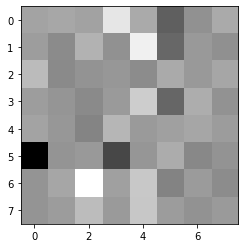

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07896344' '-0.004595285' '-0.0757571' ... '-0.12397297'
  '-0.08405779' 'Lisa']
 ['-0.09359945' '-0.0154130105' '-0.08598636' ... '-0.12857728'
  '-0.09365206' 'Lisa']
 ['-0.07771753' '-0.06826511' '-0.08063175' ... '-0.11706351'
  '-0.09766294' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


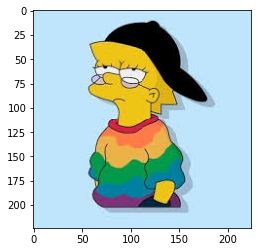

It is Homer
Lisa18
[[0. 1. 0.]]
[[-0.5299478  -0.51091903 -0.45005047 -0.7599134  -0.51323986 -1.3435541
  -0.73140997 -0.4383013  -0.59205616 -0.7150723   0.16630097 -0.7842132
  -0.83516383 -0.90883017 -0.6436855  -0.7055239  -0.09644307 -0.873569
  -0.71772456 -0.6870325  -0.9028071  -0.34110954 -0.75313795  0.27983668
  -0.5843197  -1.0697703  -0.85877204 -0.6628901  -0.5496225  -0.7462113
  -0.20716622 -0.84171176 -0.44855863 -0.6909963   0.7182335  -0.5124575
  -0.65883064 -0.36659318 -0.2823532  -0.6645988  -3.276448   -0.7246089
  -0.6990566  -2.0535169  -0.6974294  -0.27233964 -0.87418175 -0.76988393
  -0.6106855  -0.40378776 -0.6541979  -0.63337183 -0.39157462  1.
   0.92777884 -0.7852788  -0.7842001  -0.6008098   0.04614442 -0.74603784
   0.05306659 -0.6041578  -0.82089245 -0.44605622]]
[[163.77084  164.90552  168.53506  150.05824  164.76714  115.256386
  151.75789  169.23564 ]
 [160.0674   152.73209  205.28741  148.60928  145.57115  141.17851
  156.9888   153.30145 ]
 [189.

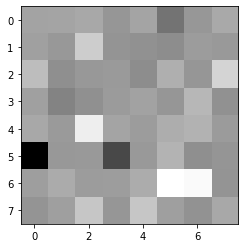

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.09359945' '-0.0154130105' '-0.08598636' ... '-0.12857728'
  '-0.09365206' 'Lisa']
 ['-0.07771753' '-0.06826511' '-0.08063175' ... '-0.11706351'
  '-0.09766294' 'Lisa']
 ['-0.08094003' '-0.07803372' '-0.068737134' ... '-0.1253766'
  '-0.06812708' 'Homer']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


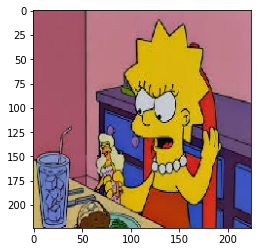

It is Lisa
Lisa19
[[0. 0. 1.]]
[[-0.38142854 -0.01097078 -0.25511345  0.476276   -0.3236762  -1.5463102
  -0.50225127 -0.2010688  -0.4052699  -0.4785325  -0.16664308 -0.40014532
   0.780632   -1.0952288  -0.45474195 -0.5031213  -0.48099077 -0.5347141
  -0.5401876  -0.43322083 -0.48988226 -0.21567954 -0.47658345 -0.08736429
  -0.32418233 -0.13403016 -0.55221856 -0.37389302 -0.10600078 -0.9460118
  -0.16939822 -0.52345824 -0.37906528 -0.4651021  -0.20743199  0.01672244
  -0.40353286 -0.30574486 -0.18559241 -0.37611872 -1.9273368  -0.44089285
  -0.38229024 -1.2364389  -0.4366149  -0.11338816 -0.49235195 -0.44029787
  -0.4794099  -0.38474318  1.         -0.4341888   0.10574632 -0.70552313
  -0.30721518 -0.5418443  -0.4238322  -0.44817263 -0.0455292  -0.40054014
   0.32488376 -0.33477315 -0.475099   -0.37205005]]
[[134.6639   166.93443  145.66719  209.37845  139.6947    33.191193
  124.139046 150.37502 ]
 [132.5871   126.20519  153.37384  133.0335   235.89088   72.48484
  128.27757  124.063

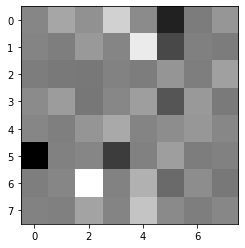

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.07771753' '-0.06826511' '-0.08063175' ... '-0.11706351'
  '-0.09766294' 'Lisa']
 ['-0.08094003' '-0.07803372' '-0.068737134' ... '-0.1253766'
  '-0.06812708' 'Homer']
 ['-0.085251614' '-0.0024520361' '-0.05701942' ... '-0.10618753'
  '-0.08315545' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


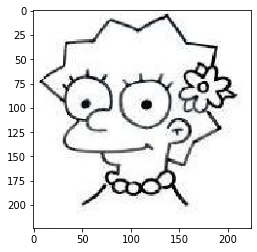

It is Lisa
Lisa20
[[0. 0. 1.]]
[[-0.45738614 -0.3300413  -0.39893764  0.6562692  -0.45789692 -1.1336592
  -0.6271726  -0.35235903 -0.5461545  -0.7393575  -0.42149377 -0.70022625
   1.         -1.3467997  -0.5231984  -0.7043173   0.27682817 -0.85227937
  -0.72934    -0.5765129  -0.6509312  -0.37111324 -0.6520538   0.18212521
  -0.43057847 -0.50738215 -0.7787154  -0.5401355  -0.51296854 -0.97656447
  -0.12335887 -0.64784294 -0.41232422 -0.64087605 -0.15729211 -0.43584478
  -0.6174977  -0.34798536 -0.2606759  -0.5345884  -2.723556   -0.6205487
  -0.548041   -1.5057081  -0.5827936  -0.2409332  -0.6371371  -0.7015571
  -0.53018785 -0.2807974   0.99575233 -0.60502315 -0.24656431 -0.2734176
  -0.22586332 -0.64099556 -0.6983686  -0.5629921  -0.16644561 -0.563991
  -0.14078294 -0.50508595 -0.626689   -0.53904355]]
[[155.19395  163.91489  159.19666  231.46031  155.15897  108.880775
  143.56647  162.38649 ]
 [149.11482  135.88371  157.65196  138.56354  255.        94.2843
  150.68692  138.28339 ]

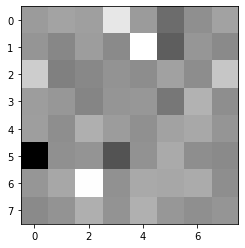

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08094003' '-0.07803372' '-0.068737134' ... '-0.1253766'
  '-0.06812708' 'Homer']
 ['-0.085251614' '-0.0024520361' '-0.05701942' ... '-0.10618753'
  '-0.08315545' 'Lisa']
 ['-0.08157456' '-0.058862675' '-0.0711503' ... '-0.11176963'
  '-0.09613811' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


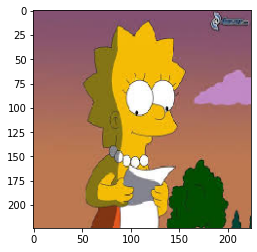

It is Lisa
Lisa21
[[0. 0. 1.]]
[[-0.20697713  0.08526969 -0.17408076  1.         -0.1912865  -0.67110527
  -0.32531375 -0.1561512  -0.22297078 -0.30340248  0.04812933 -0.33162475
   0.08996371 -0.54252315 -0.22202973 -0.30683902 -0.12791942 -0.33713865
  -0.28500473 -0.27603912 -0.34494403 -0.15270753 -0.29852003 -0.21981683
  -0.22803925  0.05820942 -0.37139678 -0.23578039  0.04988123 -0.4072665
  -0.14512737 -0.31315735 -0.28969982 -0.2666085  -0.20703955 -0.13719903
  -0.27859977 -0.20281093 -0.13546197 -0.19858614 -0.53444535 -0.27579898
  -0.29039493 -0.64430356 -0.3030624  -0.15741757 -0.32659087 -0.35405007
  -0.30394375 -0.24367414  0.58686304 -0.2282449   0.14735603 -0.3721049
  -0.31803846 -0.36250114 -0.29492506 -0.3102906  -0.08163014 -0.2922014
   0.6030573  -0.18682612 -0.28436208 -0.25872394]]
[[ 70.82299  115.41799   75.842766 255.        73.217285   0.
   52.765583  78.57871 ]
 [ 68.38247   56.1091   109.7506    51.802563 116.13427   19.620813
   68.52606   55.58471 ]


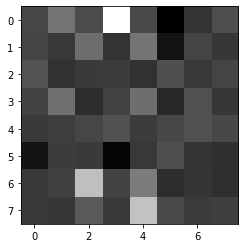

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.085251614' '-0.0024520361' '-0.05701942' ... '-0.10618753'
  '-0.08315545' 'Lisa']
 ['-0.08157456' '-0.058862675' '-0.0711503' ... '-0.11176963'
  '-0.09613811' 'Lisa']
 ['-0.078984916' '0.03253992' '-0.06643128' ... '-0.108515926'
  '-0.09873211' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


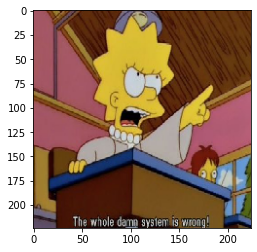

It is Lisa
Lisa22
[[0. 0. 1.]]
[[-0.6802814  -0.24980634 -0.4652233   1.         -0.5712475  -1.427463
  -0.8791124  -0.43895167 -0.61243343 -0.9324525  -0.19677201 -0.99494916
   0.20089369 -1.8586235  -0.79324996 -1.0178046  -1.4112581  -1.1084394
  -1.084406   -0.778089   -0.8468625  -0.4145565  -0.9417347   0.2940158
  -0.5384562  -0.83799356 -1.2090551  -0.8361139  -0.14958592 -1.4699674
  -0.36560312 -0.9055924  -0.80605996 -0.80783594 -0.3603419  -0.8281361
  -0.79700303 -0.4529729  -0.41574883 -0.7404046  -2.5961657  -0.84677464
  -0.73524815 -2.1788712  -0.7424052  -0.45671833 -0.94912535 -1.0234303
  -0.8256726  -0.51628447  0.6597894  -0.53469205  0.04530293 -0.75276643
  -0.276808   -1.0356708  -0.8970106  -0.5456336  -1.3883953  -0.746741
   0.8506642  -0.7373901  -0.961188   -0.72034115]]
[[135.85316  166.37766  151.10269  255.       143.58463   82.87136
  121.75429  152.96558 ]
 [140.66418  117.97199  170.13826  113.540436 198.33629   52.29827
  127.8427   111.91978 ]
 [

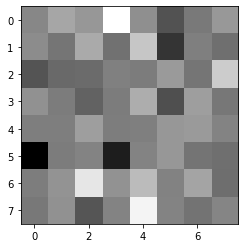

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.08157456' '-0.058862675' '-0.0711503' ... '-0.11176963'
  '-0.09613811' 'Lisa']
 ['-0.078984916' '0.03253992' '-0.06643128' ... '-0.108515926'
  '-0.09873211' 'Lisa']
 ['-0.09216913' '-0.03384546' '-0.06303161' ... '-0.13022827'
  '-0.0975967' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


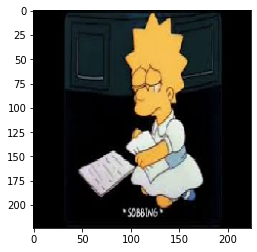

It is Lisa
Lisa23
[[0. 0. 1.]]
[[-0.17891182 -0.07231988 -0.20538712  1.         -0.20736766 -0.88117975
  -0.30238447 -0.13299498 -0.29654822 -0.3012623   0.15197363 -0.29044724
   0.5108834  -0.39770043 -0.22979458 -0.36473253 -0.48682368 -0.396886
  -0.31829694 -0.27775666 -0.33167604 -0.19260396 -0.3365686  -0.13589326
  -0.23223871  0.03680714 -0.38703343 -0.30303395 -0.07101162 -0.5824976
  -0.127423   -0.2538991  -0.2568288  -0.24626392 -0.22062197 -0.00607848
  -0.2599565  -0.14203976 -0.10549783 -0.2545981  -0.8083631  -0.2266971
  -0.23844133 -0.53834593 -0.25934976 -0.11505042 -0.31559712 -0.30062255
  -0.28187123 -0.17761096  0.6566142  -0.20938334  0.24335782 -0.37404096
  -0.21285987 -0.28603366 -0.26824677 -0.2333989  -0.2116315  -0.21633565
   0.38900584 -0.23024745 -0.30974874 -0.2153849 ]]
[[ 95.19468  109.64356   91.60588  255.        91.3374     0.
   78.45757  101.41886 ]
 [ 79.24869   78.60968  140.04727   80.0757   188.69865   65.53718
   88.297356  70.00608 ]
 [

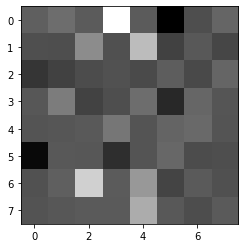

[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.078984916' '0.03253992' '-0.06643128' ... '-0.108515926'
  '-0.09873211' 'Lisa']
 ['-0.09216913' '-0.03384546' '-0.06303161' ... '-0.13022827'
  '-0.0975967' 'Lisa']
 ['-0.0648516' '-0.026214365' '-0.07444831' ... '-0.1122771'
  '-0.07807229' 'Lisa']]
/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/set1.csv


In [18]:
%matplotlib inline
vector.vector("Homer1") #0
vector.vector("Homer2") #1
vector.vector("Homer3") #2
vector.vector("Homer4") #3
vector.vector("Homer5") #4
vector.vector("Homer6") #5  No faces detected as Lisa
vector.vector("Homer7") #6
vector.vector("Homer8") #7
vector.vector("Homer8A") #8
vector.vector("Homer8B") #9 As Lisa
vector.vector("Homer8C") #10
vector.vector("Homer12") #11 AS LIsa
vector.vector("Homer13") #12
vector.vector("Homer14") #13
vector.vector("Homer15") #14
vector.vector("Homer16") #15
vector.vector("Homer18") #16
vector.vector("Homer20") #17
vector.vector("Homer20A") #18 As Lisa
vector.vector("Homer20B") #19 as bart
vector.vector("Bart1") #20
vector.vector("Bart1B") #21
vector.vector("Bart3") #22
vector.vector("Bart2A") #23 as Lisa
vector.vector("Bart5") #24 as Homer
vector.vector("Bart6") #25
vector.vector("Bart7") #26
vector.vector("Bart8") #27 as Homer
vector.vector("Bart9") #28
vector.vector("Bart10") #29
vector.vector("Bart11") #30 as Homer
vector.vector("Bart12") #31
vector.vector("Bart13") #32
vector.vector("Bart13B") #33
vector.vector("Bart15") #34
vector.vector("Bart15A") #35
vector.vector("Bart17") #36
vector.vector("Bart18") #37 as Lisa
vector.vector("Bart19") #38
vector.vector("Bart20") #39
vector.vector("Bart21") #40
vector.vector("Lisa1") #41
vector.vector("Lisa2") #42
vector.vector("Lisa3") #43
vector.vector("Lisa4") #44 Bart
vector.vector("Lisa5") #45
vector.vector("Lisa6") #46
vector.vector("Lisa7") #47
vector.vector("Lisa8") #48
vector.vector("Lisa9") #49 Homer
vector.vector("Lisa10") #50
vector.vector("Lisa11") #51
vector.vector("Lisa12") #52
vector.vector("Lisa13") #53
vector.vector("Lisa14") #54 Bart, itis a hand drawing
vector.vector("Lisa14A") #55
vector.vector("Lisa16") #56
vector.vector("Lisa17") #57
vector.vector("Lisa18") #58 Homer
vector.vector("Lisa19") #59
vector.vector("Lisa20") #60
vector.vector("Lisa21") #61
vector.vector("Lisa22") #62
vector.vector("Lisa23") #63


In [19]:
vector.save()

[['Homer1' 'Homer2' 'Homer3' 'Homer4' 'Homer5' 'Homer6' 'Homer7' 'Homer8'
  'Homer8A' 'Homer8B' 'Homer8C' 'Homer12' 'Homer13' 'Homer14' 'Homer15'
  'Homer16' 'Homer18' 'Homer20' 'Homer20A' 'Homer20B' 'Bart1' 'Bart1B'
  'Bart3' 'Bart2A' 'Bart5' 'Bart6' 'Bart7' 'Bart8' 'Bart9' 'Bart10'
  'Bart11' 'Bart12' 'Bart13' 'Bart13B' 'Bart15' 'Bart15A' 'Bart17'
  'Bart18' 'Bart19' 'Bart20' 'Bart21' 'Lisa1' 'Lisa2' 'Lisa3' 'Lisa4'
  'Lisa5' 'Lisa6' 'Lisa7' 'Lisa8' 'Lisa9' 'Lisa10' 'Lisa11' 'Lisa12'
  'Lisa13' 'Lisa14' 'Lisa14A' 'Lisa16' 'Lisa17' 'Lisa18' 'Lisa19'
  'Lisa20' 'Lisa21' 'Lisa22' 'Lisa23']]
[['-0.094085775' '-0.1221025' '-0.08292013' ... '-0.14070642'
  '-0.10106261' 'Homer']
 ['-0.09067476' '-0.07710521' '-0.07229072' ... '-0.10840687'
  '-0.06547041' 'Homer']
 ['-0.08639935' '-0.09127055' '-0.07401931' ... '-0.12551986'
  '-0.06094837' 'Homer']
 ...
 ['-0.078984916' '0.03253992' '-0.06643128' ... '-0.108515926'
  '-0.09873211' 'Lisa']
 ['-0.09216913' '-0.03384546' '-0.06303161' ... '-

In [ ]:
%matplotlib inline
vector.vector("Bart2C") #61
vector.vector("Homer8B") #62
vector.vector("Lisa20A") #63

%matplotlib inline
vector.vector("Lisa20A") #0

In [ ]:
%matplotlib qt
#%matplotlib inline
vector.pca(3,90,-90,10)


In [ ]:
vector.pca3(4)

In [ ]:
vec1=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Bart2C.npy") #Bart3
vec2=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Homer8B.npy") #LIsa1
vec3=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/Lisa20A.npy") #Bart 11 as Homer

In [ ]:
print(np.dot(vec1,vec2.transpose()))
print(np.dot(vec2,vec3.transpose()))
print(np.dot(vec1,vec3.transpose()))
print(vec1)

In [ ]:
### Analizing near points
vec4=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/2.npy")  #Lisa 13
vec5=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/10.npy")  #Homer10
vec6=np.load("/media/german/51f3aae9-4042-4d37-b815-440a1b6b695d/data2/35.npy")  #Bart15

In [ ]:
print(np.dot(vec4,vec5.transpose()))
print(np.dot(vec4,vec6.transpose()))
print(np.dot(vec5,vec6.transpose()))

In [20]:
%matplotlib inline
%matplotlib qt
vector.tnse(2)

[['Homer1']
 ['Homer2']
 ['Homer3']
 ['Homer4']
 ['Homer5']
 ['Homer6']
 ['Homer7']
 ['Homer8']
 ['Homer8A']
 ['Homer8B']
 ['Homer8C']
 ['Homer12']
 ['Homer13']
 ['Homer14']
 ['Homer15']
 ['Homer16']
 ['Homer18']
 ['Homer20']
 ['Homer20A']
 ['Homer20B']
 ['Bart1']
 ['Bart1B']
 ['Bart3']
 ['Bart2A']
 ['Bart5']
 ['Bart6']
 ['Bart7']
 ['Bart8']
 ['Bart9']
 ['Bart10']
 ['Bart11']
 ['Bart12']
 ['Bart13']
 ['Bart13B']
 ['Bart15']
 ['Bart15A']
 ['Bart17']
 ['Bart18']
 ['Bart19']
 ['Bart20']
 ['Bart21']
 ['Lisa1']
 ['Lisa2']
 ['Lisa3']
 ['Lisa4']
 ['Lisa5']
 ['Lisa6']
 ['Lisa7']
 ['Lisa8']
 ['Lisa9']
 ['Lisa10']
 ['Lisa11']
 ['Lisa12']
 ['Lisa13']
 ['Lisa14']
 ['Lisa14A']
 ['Lisa16']
 ['Lisa17']
 ['Lisa18']
 ['Lisa19']
 ['Lisa20']
 ['Lisa21']
 ['Lisa22']
 ['Lisa23']]
[t-SNE] Computing 63 nearest neighbors...
[t-SNE] Indexed 64 samples in 0.000s...
[t-SNE] Computed neighbors for 64 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 64 / 64
[t-SNE] Mean sigma: 0.303074


/home/german/Escritorio/ambiente/cnn/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/german/Escritorio/ambiente/cnn/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.678307
[t-SNE] KL divergence after 1000 iterations: 0.457909
